In [14]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.1 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np

# สร้างช่วงวันที่ 365 วัน
date_range = pd.date_range(start="2024-01-01", periods=365, freq="D")

# สร้างแนวโน้มรายรับ (Revenue)
np.random.seed(42)
base_revenue = 50000 + 10000 * np.sin(np.linspace(0, 12, 365))  # ฤดูกาล
random_noise = np.random.randint(-5000, 5000, size=365)  # ความผันผวน
revenue = base_revenue + random_noise

# สร้างแนวโน้มรายจ่าย (Expense)
base_expense = revenue * np.random.uniform(0.5, 0.7)  # รายจ่ายประมาณ 50-70% ของรายรับ
random_expense_noise = np.random.randint(-3000, 3000, size=365)  # ความผันผวน
expense = base_expense + random_expense_noise

# สร้างตัวแปรฤดูกาล (Seasonality) โดยใช้ sin เพื่อสร้างคลื่นของฤดูกาล
season = np.sin(2 * np.pi * date_range.dayofyear / 365)  # ฤดูกาลจะอยู่ในช่วง -1 ถึง 1

# สร้างตัวแปรอีเวนต์ (Event) โดยการสุ่มว่าเป็นช่วง High Season หรือไม่
event = np.random.choice([0, 1], size=365, p=[0.8, 0.2])  # 80% ไม่มีอีเวนต์, 20% มีอีเวนต์

# สร้างตัวแปรอัตราการเข้าพัก (Occupancy Rate) โดยสุ่มค่า
occupancy_rate = np.random.uniform(0.5, 0.9, size=365)  # อัตราการเข้าพักระหว่าง 50% ถึง 90%
occupancy_rate = occupancy_rate.round(2)

# สร้าง DataFrame
df = pd.DataFrame({
    "date": date_range,
    "revenue": revenue.astype(int),
    "expense": expense.astype(int),
    "event": event,
    "occupancy_rate": occupancy_rate
})

# บันทึกเป็น CSV
file_path = "hotel_revenue_expense.csv"
df.to_csv(file_path, index=False)
file_path


'hotel_revenue_expense.csv'

In [22]:
import pandas as pd
import numpy as np

# สร้างช่วงวันที่ 365 วัน
date_range = pd.date_range(start="2024-01-01", periods=365, freq="D")

# สร้างฟังก์ชันเพื่อคำนวณการสุ่มรายรับ, รายจ่าย และอัตราการเข้าพักตามฤดูกาล
def generate_revenue_expense_occupancy(month):
    # กำหนดช่วงของรายรับในแต่ละฤดูกาล
    if month in [3, 4]:  # ฤดูร้อน (มี.ค. - เม.ย.)
        revenue = np.random.randint(400000, 500000)
        expense = np.random.randint(100000, 200000)
        occupancy_rate = np.random.uniform(0.5, 0.7)  # ต่ำ
    elif month in [5, 6, 7, 8, 9, 10]:  # ฤดูฝน (พ.ค. - ต.ค.)
        revenue = np.random.randint(500000, 600000)
        expense = np.random.randint(200000, 400000)
        occupancy_rate = np.random.uniform(0.7, 0.9)  # สูง
    elif month in [11, 12, 1, 2]:  # ฤดูหนาว (พ.ย. - ก.พ.)
        revenue = np.random.randint(500000, 600000)
        expense = np.random.randint(200000, 400000)
        occupancy_rate = np.random.uniform(0.7, 0.9)  # สูง
    else:
        revenue = np.random.randint(400000, 500000)
        expense = np.random.randint(100000, 200000)
        occupancy_rate = np.random.uniform(0.5, 0.7)  # ต่ำ
    
    return revenue, expense, occupancy_rate

# สร้างการสุ่มข้อมูลตามเดือน
revenues = []
expenses = []
occupancy_rates = []
events = []

for i, date in enumerate(date_range):
    month = date.month
    revenue, expense, occupancy_rate = generate_revenue_expense_occupancy(month)
    
    revenues.append(revenue)
    expenses.append(expense)
    occupancy_rates.append(round(occupancy_rate, 2))
    
    # สุ่มว่าเป็นช่วง High Season หรือไม่
    event = np.random.choice([0, 1], p=[0.8, 0.2])
    events.append(event)

# สร้าง DataFrame
df = pd.DataFrame({
    "date": date_range,
    "revenue": revenues,
    "expense": expenses,
    "event": events,
    "occupancy_rate": occupancy_rates
})

# บันทึกเป็น CSV
file_path = "hotel_revenue_expense.csv"
df.to_csv(file_path, index=False)

file_path


'hotel_revenue_expense.csv'

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


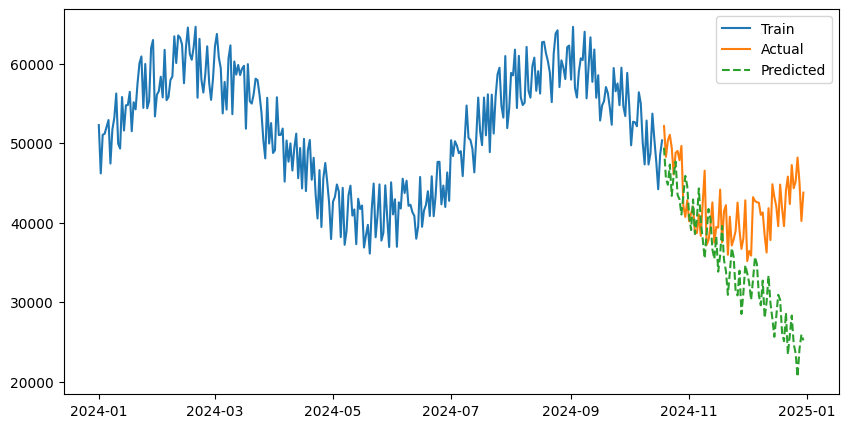

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# โหลดข้อมูลตัวอย่าง
data = pd.read_csv("hotel_revenue_expense.csv", parse_dates=["date"], index_col="date")

# สร้างตัวแปรสำหรับฤดูกาล (Seasonality), อีเวนต์, อัตราการเข้าพัก (เช่น ค่าเฉลี่ยของการจองห้องพัก)
# data['season'] = np.sin(2 * np.pi * data.index.month / 12)  # ฤดูกาล (ค่าระหว่าง -1 ถึง 1)
data['event'] = np.where(data.index.month.isin([12, 1, 7, 8]), 1, 0)  # อีเวนต์ (High season)
data['occupancy_rate'] = np.random.uniform(0.5, 0.9, len(data))  # อัตราการเข้าพัก (สมมติ)

# เลือกเฉพาะข้อมูลรายรับ
revenue_series = data["revenue"]

# แบ่งข้อมูลเป็น train/test
train_size = int(len(revenue_series) * 0.8)
train, test = revenue_series[:train_size], revenue_series[train_size:]

# สร้างโมเดล SARIMAX (ARIMA + external factors)
exog_train = data[['event', 'occupancy_rate']].iloc[:train_size]
exog_test = data[['event', 'occupancy_rate']].iloc[train_size:]

model = SARIMAX(train, exog=exog_train, order=(5,1,0), seasonal_order=(1,1,0,12))
model_fit = model.fit()

# ทำนาย
forecast = model_fit.forecast(steps=len(test), exog=exog_test)

# แสดงผล
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Actual")
plt.plot(test.index, forecast, label="Predicted", linestyle="dashed")
plt.legend()
plt.show()


/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


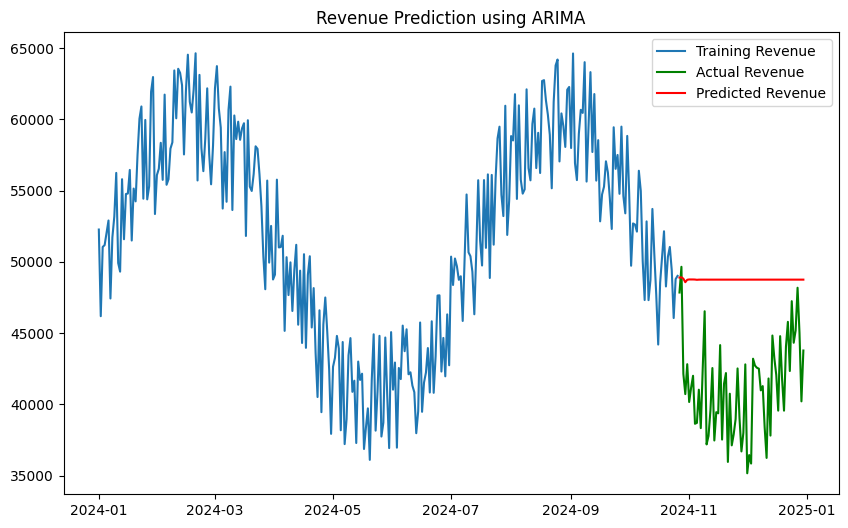

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# อ่านข้อมูล CSV ที่เราสร้างขึ้น
df = pd.read_csv('hotel_revenue_expense.csv', parse_dates=['date'], index_col='date')

# การแบ่งข้อมูลเป็น Training และ Test set
train = df[:300]  # ใช้ 300 วันแรกสำหรับ Training
test = df[300:]   # ใช้ที่เหลือสำหรับ Test

# สร้างโมเดล ARIMA สำหรับการทำนายรายรับ
model_revenue = ARIMA(train['revenue'], order=(5,1,0))  # ARIMA(p,d,q) เช่น (5,1,0)
model_revenue_fit = model_revenue.fit()

# ทำนายรายรับในอนาคต
forecast_revenue = model_revenue_fit.forecast(steps=len(test))

# สร้างกราฟแสดงผล
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['revenue'], label='Training Revenue')
plt.plot(test.index, test['revenue'], label='Actual Revenue', color='green')
plt.plot(test.index, forecast_revenue, label='Predicted Revenue', color='red')
plt.title('Revenue Prediction using ARIMA')
plt.legend()
plt.show()


Mean Squared Error: 142389619.9152643


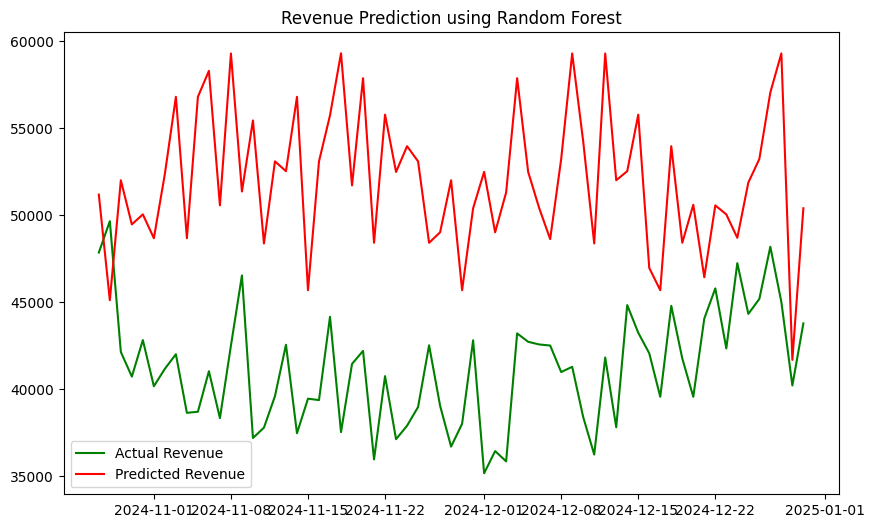

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# เตรียมข้อมูลสำหรับ Random Forest
X = df[['event', 'occupancy_rate']]
y = df['revenue']

# แบ่งข้อมูลเป็น Training และ Test
X_train = X[:300]
X_test = X[300:]
y_train = y[:300]
y_test = y[300:]

# สร้างโมเดล Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# ทำนายรายรับ
y_pred = model_rf.predict(X_test)

# คำนวณ MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# แสดงกราฟ
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Revenue', color='green')
plt.plot(y_test.index, y_pred, label='Predicted Revenue', color='red')
plt.title('Revenue Prediction using Random Forest')
plt.legend()
plt.show()


       predicted_revenue  predicted_expense
month                                      
1           1.540189e+07       6.499464e+06
2           1.371733e+07       5.534569e+06
3           1.540691e+07       6.663281e+06
4           1.498763e+07       6.312471e+06
5           1.530330e+07       6.617237e+06
6           1.503885e+07       6.684297e+06
7           1.580283e+07       7.067600e+06
8           1.528316e+07       6.309975e+06
9           1.498972e+07       6.322423e+06
10          1.576190e+07       7.137718e+06
11          1.491967e+07       6.401277e+06
12          1.502586e+07       6.046184e+06


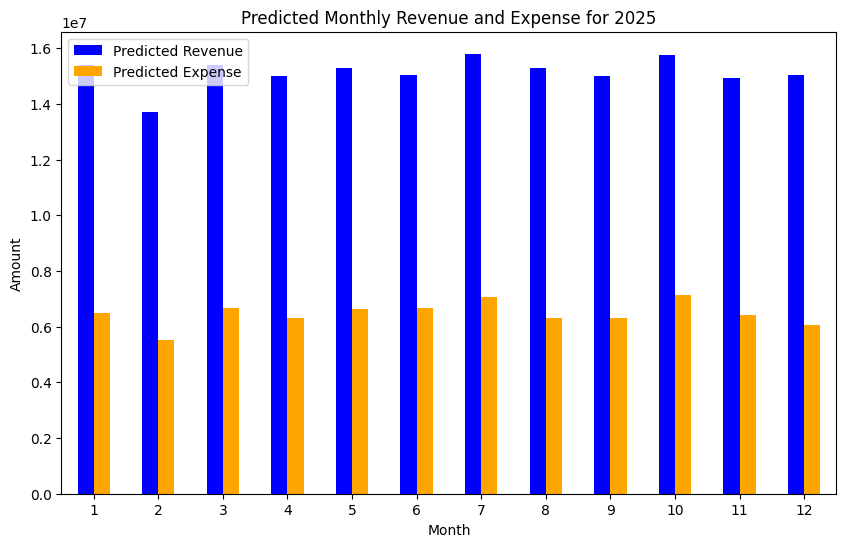

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# อ่านข้อมูล CSV ที่เราสร้างขึ้น
df = pd.read_csv('hotel_revenue_expense.csv', parse_dates=['date'], index_col='date')

# สร้างฟังก์ชันสำหรับการสร้างข้อมูลในแต่ละเดือน
df['month'] = df.index.month
df['year'] = df.index.year

# ใช้ข้อมูลในปีปัจจุบัน (2024) สำหรับ Training
train = df[df['year'] == 2024]

# ตัวแปรที่ใช้ทำนาย
X = train[['event', 'occupancy_rate']]
y_revenue = train['revenue']
y_expense = train['expense']

# สร้างโมเดล RandomForestRegressor สำหรับทำนายรายรับและรายจ่าย
model_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
model_revenue.fit(X, y_revenue)

model_expense = RandomForestRegressor(n_estimators=100, random_state=42)
model_expense.fit(X, y_expense)

# สร้างข้อมูลสำหรับปีหน้า (2025)
future_dates = pd.date_range(start="2025-01-01", end="2025-12-31", freq="D")
future_df = pd.DataFrame({"date": future_dates})

# สร้างตัวแปรที่จำเป็นสำหรับการทำนายในปีหน้า
# สร้างตัวแปรที่จำเป็นสำหรับการทำนายในปีหน้า
future_df['month'] = future_df['date'].dt.month  # แก้ไขจาก .month เป็น .dt.month
future_df['event'] = np.random.choice([0, 1], size=len(future_df), p=[0.8, 0.2])
future_df['occupancy_rate'] = np.random.uniform(0.5, 0.9, size=len(future_df))

# ทำนายรายรับและรายจ่ายในปีหน้า
future_df['predicted_revenue'] = model_revenue.predict(future_df[['event', 'occupancy_rate']])
future_df['predicted_expense'] = model_expense.predict(future_df[['event', 'occupancy_rate']])

# คำนวณรายรับและรายจ่ายรวมในแต่ละเดือน
monthly_summary = future_df.groupby('month')[['predicted_revenue', 'predicted_expense']].sum()

# แสดงผลในรูปแบบตาราง
print(monthly_summary)

# แสดงกราฟแท่ง
monthly_summary.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Predicted Monthly Revenue and Expense for 2025')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['Predicted Revenue', 'Predicted Expense'])
plt.show()



            predicted_revenue  predicted_expense
month_name                                      
January           17077691.61         8900524.99
February          15380765.26         8047906.03
March             14171822.87         4746852.30
April             13423571.42         4184312.47
May               17156814.67         8970267.65
June              16607036.10         8722794.06
July              17031539.72         9236428.17
August            17101752.30         9155549.01
September         16481340.65         8719734.96
October           17023419.13         8931653.24
November          16460736.02         8632490.19
December          17117771.32         8899295.74


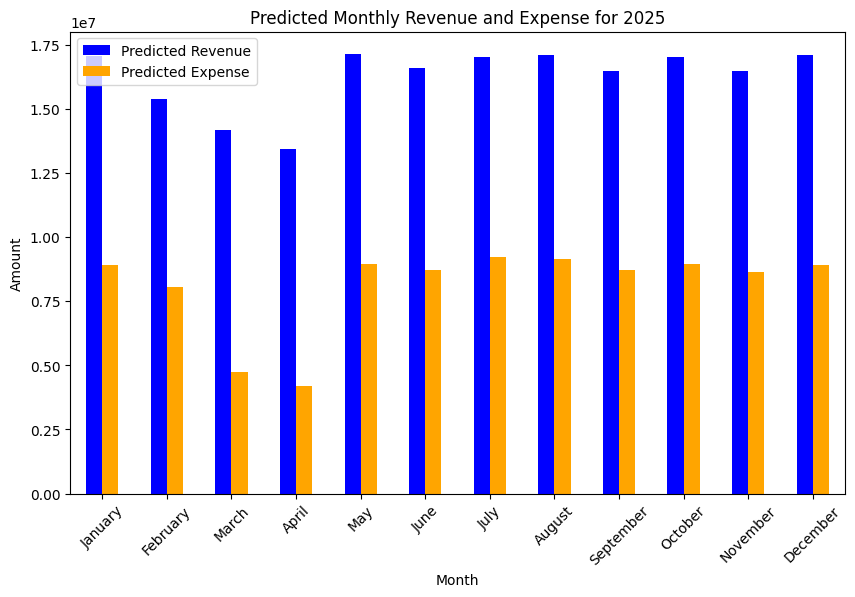

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# อ่านข้อมูล CSV ที่เราสร้างขึ้น
df = pd.read_csv('hotel_revenue_expense.csv', parse_dates=['date'], index_col='date')

# สร้างฟังก์ชันสำหรับการสร้างข้อมูลในแต่ละเดือน
df['month'] = df.index.month
df['year'] = df.index.year

# ใช้ข้อมูลในปีปัจจุบัน (2024) สำหรับ Training
train = df[df['year'] == 2024]

# ตัวแปรที่ใช้ทำนาย
X = train[['event', 'occupancy_rate']]
y_revenue = train['revenue']
y_expense = train['expense']

# สร้างโมเดล RandomForestRegressor สำหรับทำนายรายรับและรายจ่าย
model_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
model_revenue.fit(X, y_revenue)

model_expense = RandomForestRegressor(n_estimators=100, random_state=42)
model_expense.fit(X, y_expense)

# สร้างข้อมูลสำหรับปีหน้า (2025)
future_dates = pd.date_range(start="2025-01-01", end="2025-12-31", freq="D")
future_df = pd.DataFrame({"date": future_dates})

# สร้างตัวแปรที่จำเป็นสำหรับการทำนายในปีหน้า
future_df['month'] = future_df['date'].dt.month
future_df['month_name'] = future_df['date'].dt.month_name()  # ดึงชื่อเดือน
future_df['event'] = np.random.choice([0, 1], size=len(future_df), p=[0.8, 0.2])

# ปรับการสุ่มอัตราการเข้าพักตามฤดูกาล
def get_season_occupancy(month):
    if month in [3, 4]:  # ฤดูร้อน (มี.ค. - เม.ย.)
        return np.random.uniform(0.5, 0.7)  # ต่ำ
    elif month in [5, 6, 7, 8, 9, 10]:  # ฤดูฝน (พ.ค. - ต.ค.)
        return np.random.uniform(0.7, 0.9)  # สูง
    elif month in [11, 12, 1, 2]:  # ฤดูหนาว (พ.ย. - ก.พ.)
        return np.random.uniform(0.7, 0.9)  # สูง

# สร้างตัวแปร occupancy_rate ที่สอดคล้องกับฤดูกาล
future_df['occupancy_rate'] = future_df['month'].apply(get_season_occupancy)

# ทำนายรายรับและรายจ่ายในปีหน้า
future_df['predicted_revenue'] = model_revenue.predict(future_df[['event', 'occupancy_rate']])
future_df['predicted_expense'] = model_expense.predict(future_df[['event', 'occupancy_rate']])

# คำนวณรายรับและรายจ่ายรวมในแต่ละเดือน
monthly_summary = future_df.groupby('month_name')[['predicted_revenue', 'predicted_expense']].sum()

# จัดเรียงตามลำดับเดือน
monthly_summary = monthly_summary.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# แสดงผลในรูปแบบตาราง
monthly_summary['predicted_revenue'] = monthly_summary['predicted_revenue'].round(2)
monthly_summary['predicted_expense'] = monthly_summary['predicted_expense'].round(2)
print(monthly_summary)

# แสดงกราฟแท่ง
monthly_summary.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Predicted Monthly Revenue and Expense for 2025')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(['Predicted Revenue', 'Predicted Expense'])
plt.show()


In [26]:
df_montara = pd.read_csv('/Users/theerat/Downloads/ม่อนธารารีสอร์ทล่าสุด - ม.ค. 65.csv', usecols=[0, -1])
print(df)

ValueError: Usecols do not match columns, columns expected but not found: [0, -1]

In [31]:
import pandas as pd

# อ่านไฟล์ CSV
df = pd.read_csv('/Users/theerat/Downloads/ม่อนธารารีสอร์ทล่าสุด - ม.ค. 65.csv')

# แปลงวันที่ให้เป็นรูปแบบ 01/01/2022
df.loc[:, 'วันที่'] = pd.to_datetime(df['วันที่'], format='%d/%m/%y').dt.strftime('%d/%m/%Y')

# คำนวณ accuracy และเพิ่มเข้าไปในคอลัมน์ใหม่
df.loc[:, 'accuracy'] = (df['จำนวนห้อง'] / 800 * 100).round(2)

# เลือกคอลัมน์ที่ต้องการแสดง
df_selected = df[['วันที่', 'จำนวนห้อง', 'accuracy']]

# แสดงผลลัพธ์
print(df_selected)


        วันที่  จำนวนห้อง  accuracy
0   01/01/2022          8      1.00
1   02/01/2022          8      1.00
2   03/01/2022          3      0.38
3   04/01/2022          3      0.38
4   05/01/2022          0      0.00
5   06/01/2022          1      0.12
6   07/01/2022          2      0.25
7   08/01/2022          4      0.50
8   09/01/2022          1      0.12
9   10/01/2022          1      0.12
10  11/01/2022          0      0.00
11  12/01/2022          1      0.12
12  13/01/2022          0      0.00
13  14/01/2022          0      0.00
14  15/01/2022          1      0.12
15  16/01/2022          0      0.00
16  17/01/2022          0      0.00
17  18/01/2022          0      0.00
18  19/01/2022          0      0.00
19  20/01/2022          1      0.12
20  21/01/2022          1      0.12
21  22/01/2022          7      0.88
22  23/01/2022          0      0.00
23  24/01/2022          0      0.00
24  25/01/2022          0      0.00
25  26/01/2022          0      0.00
26  27/01/2022          3   

In [41]:
import os
import pandas as pd

# กำหนดโฟลเดอร์ที่เก็บไฟล์ CSV
folder_path = '/Users/theerat/Downloads/'

final_df = pd.DataFrame()

for month in ['ม.ค. 65', 'ก.พ. 65', 'มี.ค. 65', 'เม.ย. 65', 'พ.ค. 65', 'มิ.ย. 65', 'ก.ค. 65', 'ส.ค. 65', 'ก.ย. 65', 'ต.ค. 65', 'พ.ย. 65', 'ธ.ค. 65']:
    file_path = os.path.join(folder_path, f'ม่อนธารารีสอร์ทล่าสุด - {month}.csv')
    df = pd.read_csv(file_path)
    # print(f"Column names in {month}:", df.columns.tolist())
    df.loc[:, 'วันที่'] = pd.to_datetime(df['วันที่'], format='%d/%m/%y').dt.strftime('%d/%m/%Y')
    df.loc[:, 'accuracy'] = (df['จำนวนห้อง'] / 800 * 100).round(2)
    df_selected = df[['วันที่', 'จำนวนห้อง', 'accuracy']]
    final_df = pd.concat([final_df, df_selected], ignore_index=True)

print(final_df)
file_path = "booking_trend.csv"
final_df.to_csv(file_path, index=False)

         วันที่  จำนวนห้อง  accuracy
0    01/01/2022        8.0      1.00
1    02/01/2022        8.0      1.00
2    03/01/2022        3.0      0.38
3    04/01/2022        3.0      0.38
4    05/01/2022        0.0      0.00
..          ...        ...       ...
378  29/12/2022        4.0      0.50
379  30/12/2022        8.0      1.00
380  31/12/2022        8.0      1.00
381         NaN        NaN       NaN
382         NaN        NaN       NaN

[383 rows x 3 columns]


In [2]:
import pandas as pd
from datetime import datetime

# อ่านข้อมูลจาก CSV
df = pd.read_csv('booking_trend.csv')

# แปลงคอลัมน์วันที่เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# ตั้งวันที่เป็น index
df.set_index('date', inplace=True)

# ตรวจสอบข้อมูล
print(df.head())


            booking  accuracy
date                         
2022-01-01      8.0      1.00
2022-01-02      8.0      1.00
2022-01-03      3.0      0.38
2022-01-04      3.0      0.38
2022-01-05      0.0      0.00


In [3]:
# คำนวณค่าเฉลี่ยของจำนวนห้องที่จองในแต่ละเดือน
monthly_avg_rooms = df.resample('M').mean()['booking']
print("ค่าเฉลี่ยจำนวนห้องที่จองในแต่ละเดือน:")
print(monthly_avg_rooms)


ค่าเฉลี่ยจำนวนห้องที่จองในแต่ละเดือน:
date
2022-01-31    1.709677
2022-02-28    0.214286
2022-03-31    0.193548
2022-04-30    0.600000
2022-05-31    0.290323
2022-06-30    0.000000
2022-07-31    0.290323
2022-08-31    0.193548
2022-09-30    0.000000
2022-10-31    0.580645
2022-11-30    0.500000
2022-12-31    1.161290
Freq: ME, Name: booking, dtype: float64


/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/1485780768.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rooms = df.resample('M').mean()['booking']


            booking  accuracy
date                         
2022-01-01      8.0      1.00
2022-01-02      8.0      1.00
2022-01-03      3.0      0.38
2022-01-04      3.0      0.38
2022-01-05      0.0      0.00
ADF Statistic: -9.912086135810407
p-value: 3.149490838376249e-17
ข้อมูลเป็น stationary ไม่ต้องทำ differencing


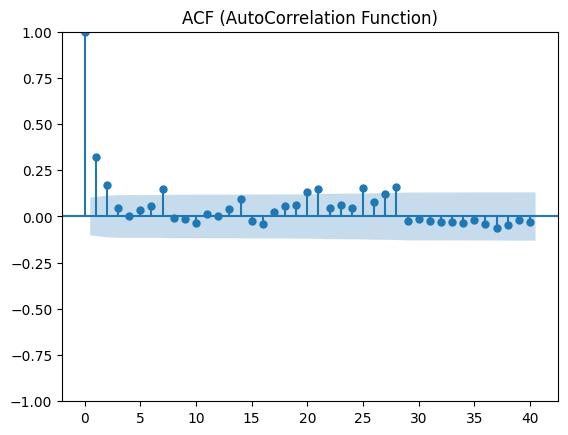

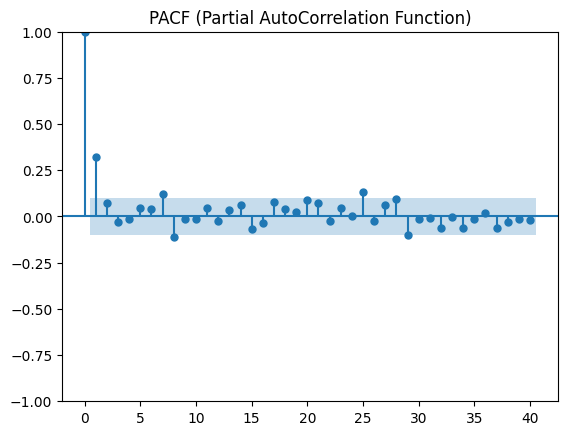

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# อ่านข้อมูลจาก CSV
df = pd.read_csv('booking_trend.csv')

# แปลงคอลัมน์วันที่เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# ตั้งวันที่เป็น index
df.set_index('date', inplace=True)

# ตรวจสอบข้อมูล
print(df.head())

# ตรวจสอบ Stationarity ของข้อมูล (ค่า d)
result = adfuller(df['booking'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# ถ้า p-value > 0.05 แสดงว่าเป็น non-stationary, ต้องทำ differencing
if result[1] > 0.05:
    print("ข้อมูลไม่เป็น stationary ต้องทำ differencing")
    df['booking_diff'] = df['booking'].diff().dropna()
else:
    print("ข้อมูลเป็น stationary ไม่ต้องทำ differencing")

# วาดกราฟ ACF และ PACF
plot_acf(df['booking'].dropna(), lags=40)  # ACF สำหรับการหาค่า q
plt.title('ACF (AutoCorrelation Function)')
plt.show()

plot_pacf(df['booking'].dropna(), lags=40)  # PACF สำหรับการหาค่า p
plt.title('PACF (Partial AutoCorrelation Function)')
plt.show()


/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                              booking   No. Observations:                  365
Model:             SARIMAX(5, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -597.094
Date:                              Sat, 08 Mar 2025   AIC                           1210.188
Time:                                      00:28:53   BIC                           1241.120
Sample:                                  01-01-2022   HQIC                          1222.496
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3566      0.030     12.049      0.000       0.299       0.415
ar.L2          0.18

/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/3027053748.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(rooms.index[-1], periods=13, freq='M')[1:], forecast.predicted_mean, label='predict', color='red')
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

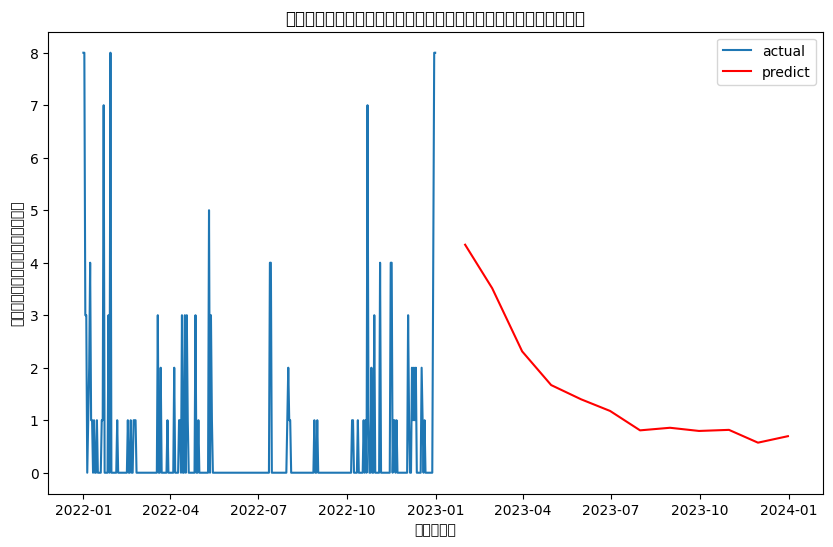

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# สมมุติว่า df คือข้อมูลที่ได้จาก CSV
df = pd.read_csv('booking_trend.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.set_index('date', inplace=True)

# ใช้ข้อมูลจำนวนห้องที่จอง
rooms = df['booking']

# สร้างโมเดล SARIMA โดยตั้งพารามิเตอร์ที่เหมาะสม
# p, d, q คือพารามิเตอร์ที่เลือกจากการวิเคราะห์ ACF และ PACF
# P, D, Q คือพารามิเตอร์ฤดูกาล (ที่ควรตั้งเป็น 1 สำหรับข้อมูลรายปี)
# m = 12 เนื่องจากข้อมูลเป็นรายเดือน
model = SARIMAX(rooms, order=(5, 0, 0), seasonal_order=(1, 1, 1, 12))

# ฟิตโมเดล
model_fit = model.fit()

# ดูผลลัพธ์ของโมเดล
print(model_fit.summary())

# ทำนายจำนวนห้องที่จองในอนาคต 12 เดือน
forecast = model_fit.get_forecast(steps=12)

# ผลลัพธ์การทำนาย
print("ทำนายจำนวนห้องที่จองในอนาคต 12 เดือน:")
print(forecast.predicted_mean)

# แสดงกราฟการทำนาย
plt.figure(figsize=(10, 6))
plt.plot(rooms.index, rooms, label='actual')
plt.plot(pd.date_range(rooms.index[-1], periods=13, freq='M')[1:], forecast.predicted_mean, label='predict', color='red')
plt.title('การทำนายจำนวนห้องที่จองในอนาคต')
plt.xlabel('เดือน')
plt.ylabel('จำนวนห้องที่จอง')
plt.legend()
plt.show()


In [17]:
%pip install prophet


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 4.2 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Note: you may need to restart the kernel to use updated packages.


00:36:34 - cmdstanpy - INFO - Chain [1] start processing
00:36:34 - cmdstanpy - INFO - Chain [1] done processing


        date  booking  accuracy
0 2022-01-01      8.0      1.00
1 2022-01-02      8.0      1.00
2 2022-01-03      3.0      0.38
3 2022-01-04      3.0      0.38
4 2022-01-05      0.0      0.00
ทำนายจำนวนห้องที่จองในอนาคต 12 เดือน:
            ds      yhat
365 2023-01-01  1.515440
366 2023-02-01 -1.462504
367 2023-03-01 -2.110873
368 2023-04-01 -1.767739
369 2023-05-01 -1.565398
370 2023-06-01 -2.013354
371 2023-07-01 -1.834735
372 2023-08-01 -1.719408
373 2023-09-01 -1.933159
374 2023-10-01 -2.142032
375 2023-11-01 -1.448699
376 2023-12-01 -1.765523


/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/s

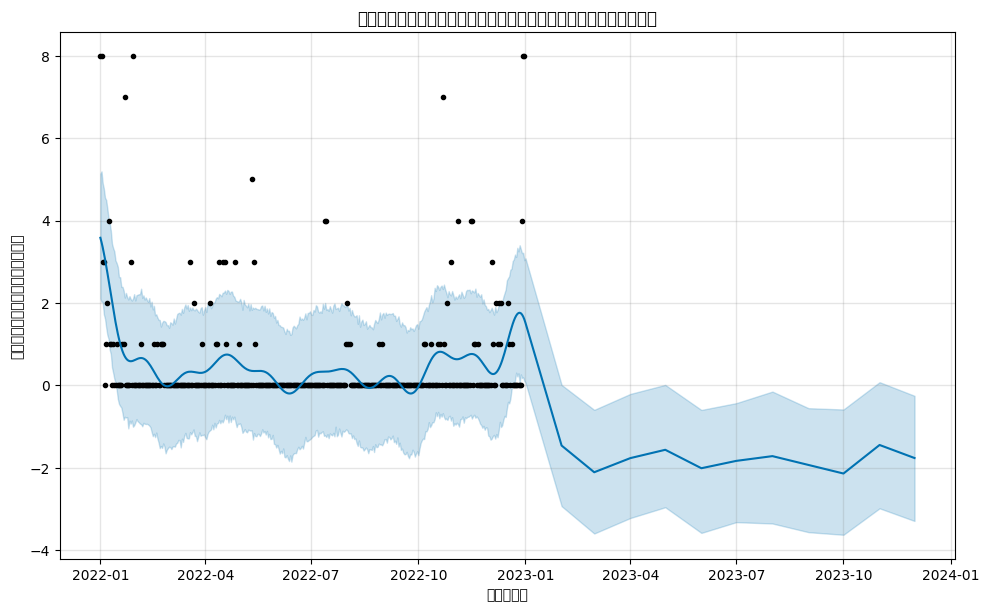

In [24]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# อ่านข้อมูลจาก CSV
df = pd.read_csv('booking_trend.csv')

# แปลงคอลัมน์วันที่เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# ตรวจสอบข้อมูล
print(df.head())

# สร้าง DataFrame ที่เหมาะสมกับ Prophet (ชื่อคอลัมน์ต้องเป็น ds (date) และ y (value))
df_prophet = df[['date', 'booking']].rename(columns={'date': 'ds', 'booking': 'y'})

# สร้างโมเดล Prophet
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# ฟิตโมเดล
model.fit(df_prophet)

# ทำนายจำนวนห้องที่จองในอนาคต 12 เดือน
future = model.make_future_dataframe(periods=12, freq='MS')  # 'MS' สำหรับเริ่มต้นที่เดือนแรกของแต่ละเดือน
forecast = model.predict(future)

# แสดงผลการทำนาย
print("ทำนายจำนวนห้องที่จองในอนาคต 12 เดือน:")
print(forecast[['ds', 'yhat']].tail(12))  # yhat คือการทำนาย

# แสดงกราฟการทำนาย
fig = model.plot(forecast)
plt.title('การทำนายจำนวนห้องที่จองในอนาคต')
plt.xlabel('เดือน')
plt.ylabel('จำนวนห้องที่จอง')
plt.show()

00:41:57 - cmdstanpy - INFO - Chain [1] start processing


ข้อมูลการจองห้องพัก 5 รายการแรก:
        date  booking  accuracy
0 2022-01-01      8.0      1.00
1 2022-01-02      8.0      1.00
2 2022-01-03      3.0      0.38
3 2022-01-04      3.0      0.38
4 2022-01-05      0.0      0.00

สรุปข้อมูล:
                                date     booking    accuracy
count                            365  365.000000  365.000000
mean   2022-07-01 23:59:59.999999744    0.482192    0.059918
min              2022-01-01 00:00:00    0.000000    0.000000
25%              2022-04-02 00:00:00    0.000000    0.000000
50%              2022-07-02 00:00:00    0.000000    0.000000
75%              2022-10-01 00:00:00    0.000000    0.000000
max              2022-12-31 00:00:00    8.000000    1.000000
std                              NaN    1.329230    0.166335


00:41:58 - cmdstanpy - INFO - Chain [1] done processing



ทำนายจำนวนห้องที่จองเฉลี่ยรายเดือนในปี 2026:
           yhat_rounded  occupancy_rate_rounded
month                                          
January             NaN                     NaN
February            NaN                     NaN
March               NaN                     NaN
April               NaN                     NaN
May                 NaN                     NaN
June                NaN                     NaN
July                NaN                     NaN
August              NaN                     NaN
September           NaN                     NaN
October             NaN                     NaN
November            NaN                     NaN
December            NaN                     NaN

ทำนายจำนวนห้องที่จองเฉลี่ยตามวันในสัปดาห์ในปี 2026:
             yhat_rounded  occupancy_rate_rounded
day_of_week                                      
Monday                NaN                     NaN
Tuesday               NaN                     NaN
Wednesday             NaN    

/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/2218005207.py:132: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/2218005207.py:132: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/2218005207.py:132: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/2218005207.py:132: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/2218005207.py:132: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000g

<Figure size 1400x700 with 0 Axes>

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/s

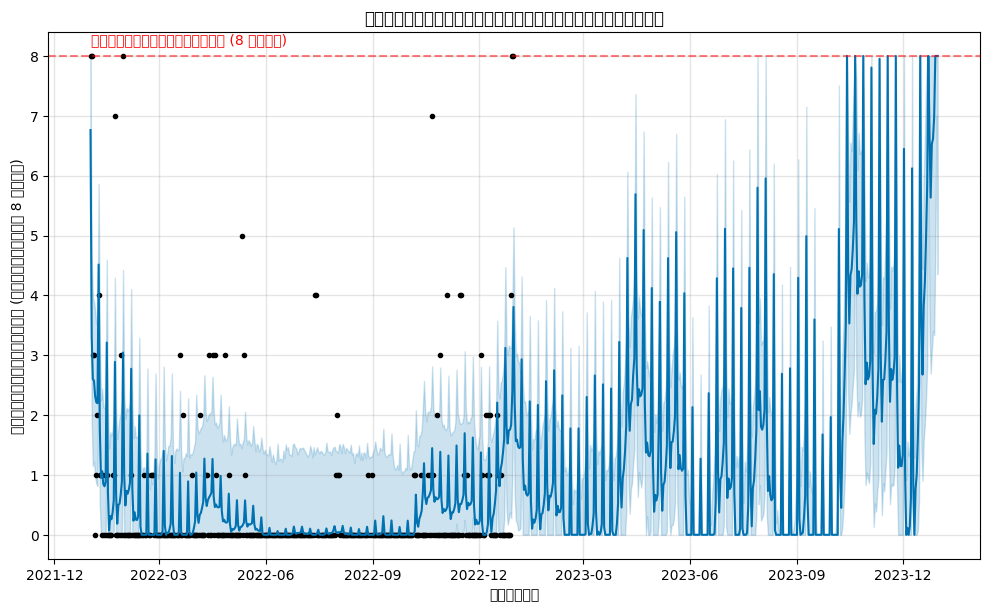

<Figure size 1400x1000 with 0 Axes>

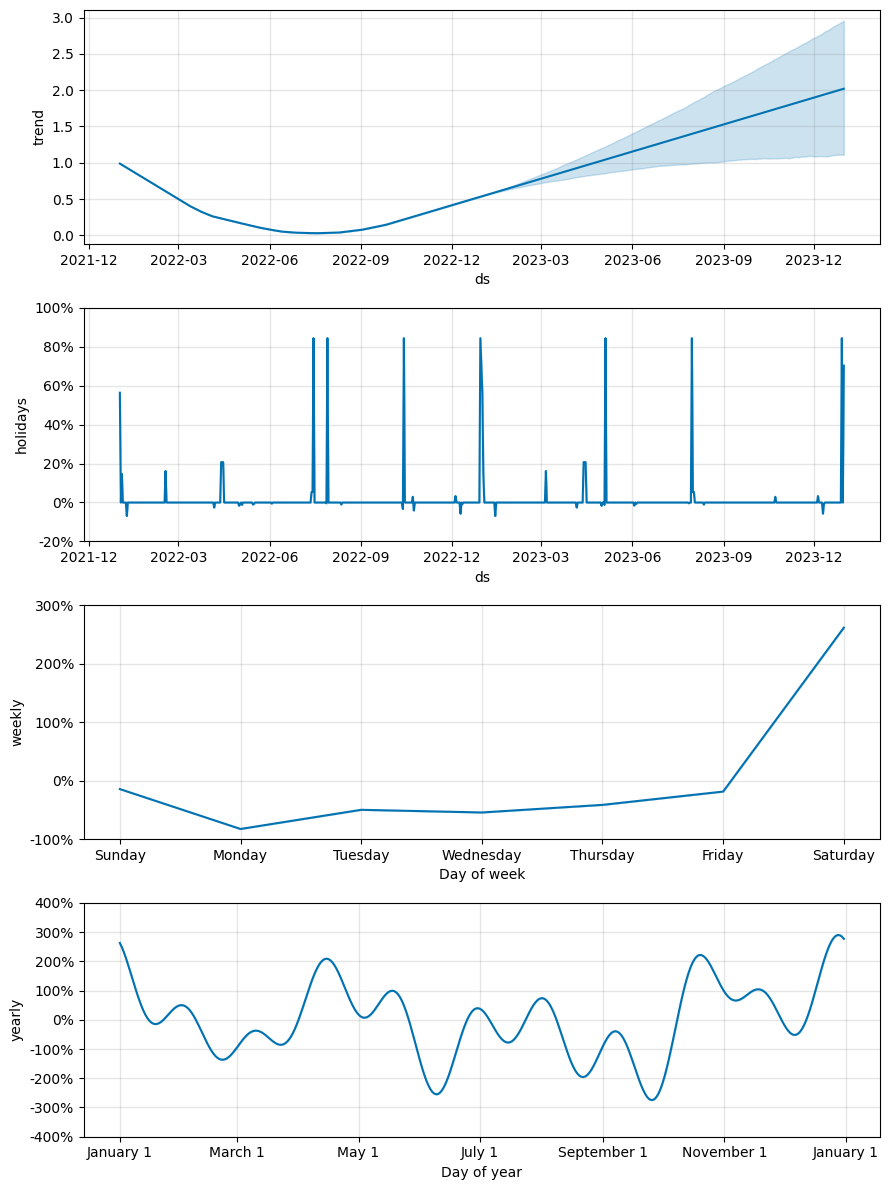

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3593 (\N{THAI CHARACTER CHO CHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/

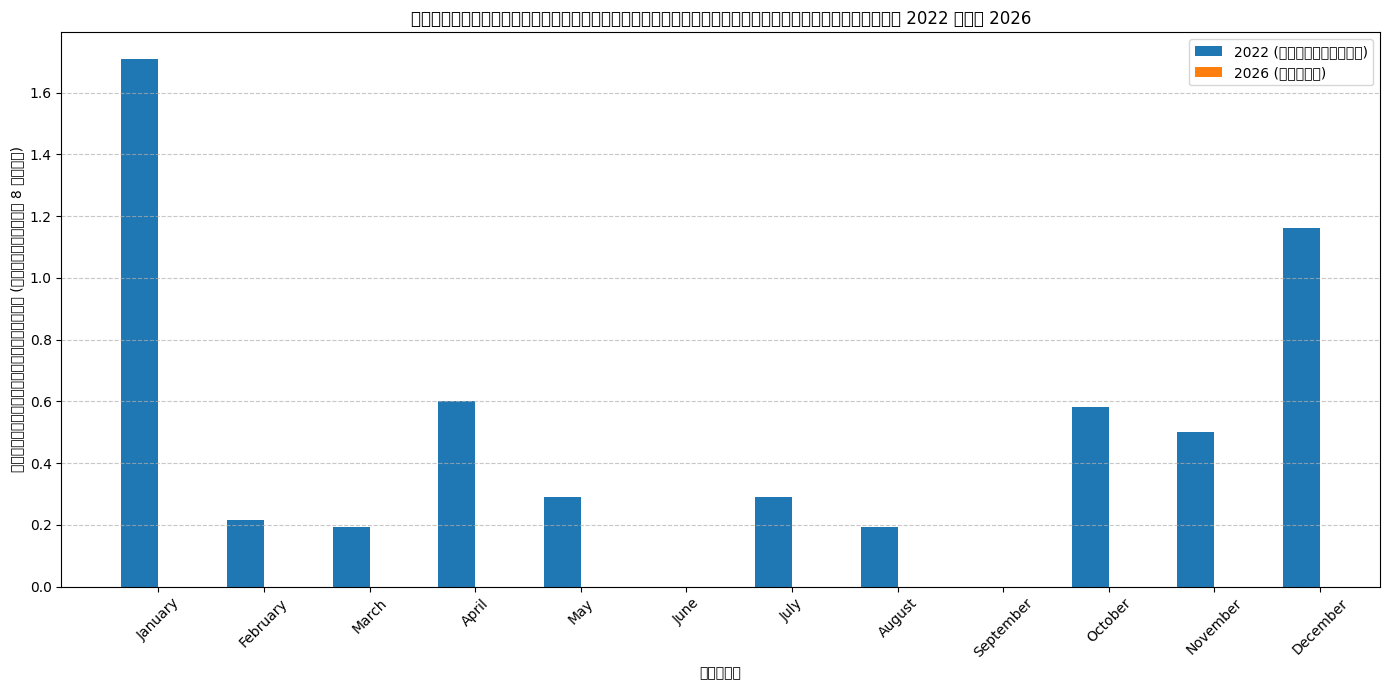

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


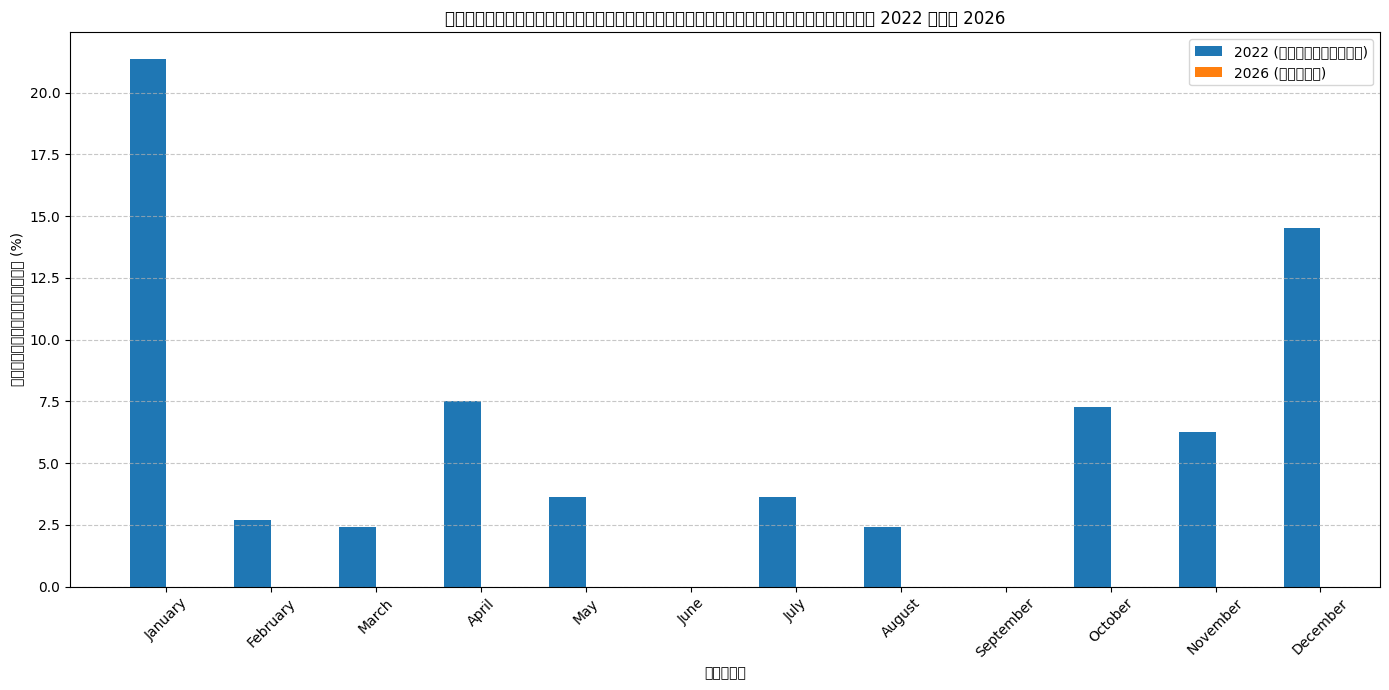

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3608 (\N{THAI CHARACTER THO THONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


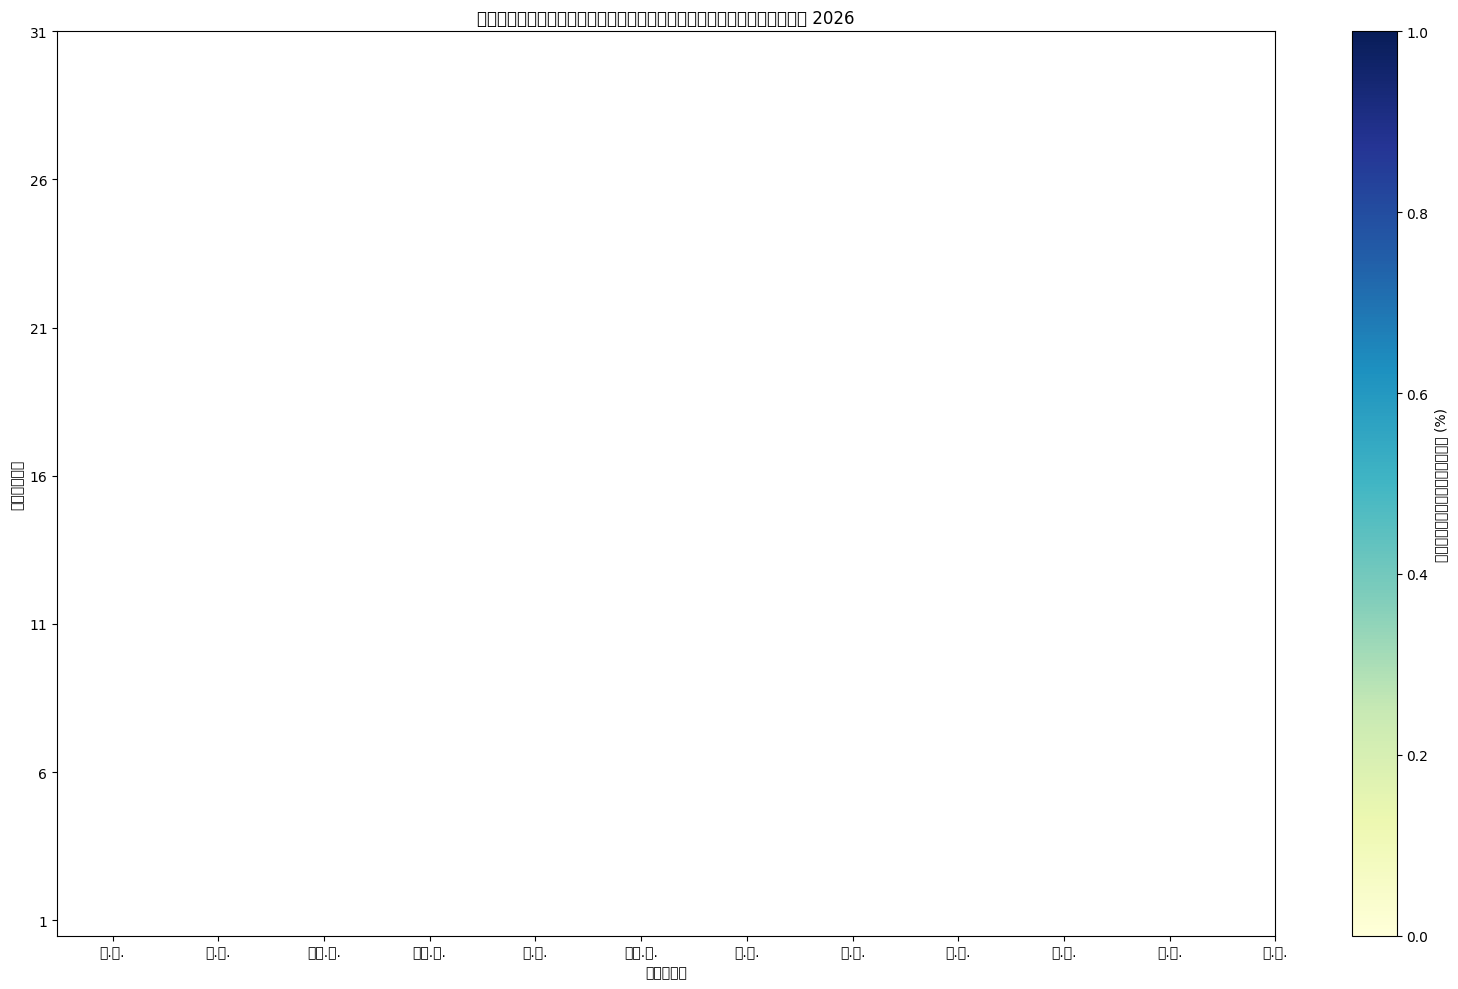


บันทึกผลการทำนายรายวันเรียบร้อยแล้วที่ booking_forecast_daily_2026.csv
บันทึกผลการทำนายรายเดือนเรียบร้อยแล้วที่ booking_forecast_monthly_2026.csv


In [26]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('booking_trend.csv')

# แปลงคอลัมน์วันที่เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# ตรวจสอบข้อมูล
print("ข้อมูลการจองห้องพัก 5 รายการแรก:")
print(df.head())

print("\nสรุปข้อมูล:")
print(df.describe())

# คำนวณอัตราการเข้าพัก (Occupancy Rate) รายวัน
df['occupancy_rate'] = df['booking'] / 8 * 100  # เป็นเปอร์เซ็นต์

# สร้าง DataFrame ที่เหมาะสมกับ Prophet
df_prophet = df[['date', 'booking']].rename(columns={'date': 'ds', 'booking': 'y'})

# สร้างวันหยุดไทยสำหรับ Prophet
thai_holidays = pd.DataFrame({
    'holiday': ['thai_newyear', 'thai_newyear', 'thai_newyear',
                'thai_newyear', 'thai_newyear', 'thai_newyear'],
    'ds': pd.to_datetime(['2022-04-13', '2022-04-14', '2022-04-15',  # สงกรานต์ 2022
                          '2023-04-13', '2023-04-14', '2023-04-15']),  # สงกรานต์ 2023
    'lower_window': 0,
    'upper_window': 0,
})

# สร้างโมเดล Prophet ที่เน้นความเป็นฤดูกาลรายปีและรายสัปดาห์
model = Prophet(
    yearly_seasonality=True,    # เปิดใช้ความเป็นฤดูกาลรายปี
    weekly_seasonality=True,    # เปิดใช้ความเป็นฤดูกาลรายสัปดาห์
    daily_seasonality=False,
    seasonality_mode='multiplicative',  # ใช้โหมดแบบคูณเพื่อแสดงความแตกต่างของฤดูกาลได้ชัดเจน
    seasonality_prior_scale=10,  # เพิ่มค่านี้เพื่อให้น้ำหนักกับความเป็นฤดูกาลมากขึ้น
    changepoint_prior_scale=0.05,  # ควบคุมความยืดหยุ่นของเทรนด์
    holidays=thai_holidays  # เพิ่มวันหยุดที่กำหนดเอง
)

# เพิ่มวันหยุดประเทศไทย
model.add_country_holidays(country_name='TH')

# ฟิตโมเดล
model.fit(df_prophet)

# ทำนายจำนวนห้องที่จองในอนาคต 365 วัน
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

# ประมวลผลการทำนาย
# กำหนดให้การทำนายต้องไม่เกิน 8 ห้อง และไม่น้อยกว่า 0
forecast['yhat'] = forecast['yhat'].clip(lower=0, upper=8)
forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0, upper=8)
forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0, upper=8)

# คำนวณอัตราการเข้าพัก (Occupancy Rate) จากการทำนาย
forecast['occupancy_rate'] = forecast['yhat'] / 8 * 100

# สร้างคอลัมน์เดือนและวันในสัปดาห์เพื่อการวิเคราะห์
forecast['month'] = forecast['ds'].dt.month_name()
forecast['day_of_week'] = forecast['ds'].dt.day_name()
forecast['year'] = forecast['ds'].dt.year

# แสดงข้อมูลการทำนายสำหรับปีหน้า
next_year = datetime.now().year + 1
next_year_forecast = forecast[forecast['year'] == next_year].copy()
next_year_forecast['yhat_rounded'] = np.round(next_year_forecast['yhat'], 2)
next_year_forecast['occupancy_rate_rounded'] = np.round(next_year_forecast['occupancy_rate'], 2)

print(f"\nทำนายจำนวนห้องที่จองเฉลี่ยรายเดือนในปี {next_year}:")
monthly_avg = next_year_forecast.groupby('month')[['yhat_rounded', 'occupancy_rate_rounded']].mean()
# เรียงเดือนให้ถูกต้อง
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)
print(monthly_avg)

# วิเคราะห์วันในสัปดาห์ที่มีการจองมากที่สุด
print(f"\nทำนายจำนวนห้องที่จองเฉลี่ยตามวันในสัปดาห์ในปี {next_year}:")
day_of_week_avg = next_year_forecast.groupby('day_of_week')[['yhat_rounded', 'occupancy_rate_rounded']].mean()
# เรียงวันในสัปดาห์ให้ถูกต้อง
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_avg = day_of_week_avg.reindex(day_order)
print(day_of_week_avg)

# แสดงกราฟการทำนาย
plt.figure(figsize=(14, 7))
fig = model.plot(forecast)
plt.title('การทำนายจำนวนห้องที่จองในอนาคต')
plt.xlabel('วันที่')
plt.ylabel('จำนวนห้องที่จอง (จากทั้งหมด 8 ห้อง)')
plt.axhline(y=8, color='r', linestyle='--', alpha=0.5)
plt.text(future['ds'].min(), 8.2, 'จำนวนห้องทั้งหมด (8 ห้อง)', color='r')

# แสดงองค์ประกอบของการทำนาย เพื่อดูความเป็นฤดูกาล
plt.figure(figsize=(14, 10))
components_fig = model.plot_components(forecast)
plt.tight_layout()

# แสดงกราฟเปรียบเทียบการจองตามเดือน
plt.figure(figsize=(14, 7))

# ข้อมูลจริงจากปี 2022
actual_data = df.copy()
actual_data['month'] = actual_data['date'].dt.month_name()
actual_monthly = actual_data.groupby('month')['booking'].mean()
actual_monthly = actual_monthly.reindex(month_order)

# ข้อมูลทำนายสำหรับปีหน้า
pred_monthly = monthly_avg['yhat_rounded']

# สร้างกราฟเปรียบเทียบ
bar_width = 0.35
x = np.arange(len(month_order))

plt.bar(x - bar_width/2, actual_monthly, bar_width, label='2022 (ข้อมูลจริง)')
plt.bar(x + bar_width/2, pred_monthly, bar_width, label=f'{next_year} (ทำนาย)')

plt.xlabel('เดือน')
plt.ylabel('จำนวนห้องที่จองเฉลี่ย (จากทั้งหมด 8 ห้อง)')
plt.title(f'เปรียบเทียบจำนวนห้องที่จองเฉลี่ยรายเดือนระหว่างปี 2022 และ {next_year}')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# สร้างกราฟแสดงอัตราการเข้าพัก (Occupancy Rate) รายเดือน
plt.figure(figsize=(14, 7))
plt.bar(x - bar_width/2, actual_monthly/8*100, bar_width, label='2022 (ข้อมูลจริง)')
plt.bar(x + bar_width/2, monthly_avg['occupancy_rate_rounded'], bar_width, label=f'{next_year} (ทำนาย)')

plt.xlabel('เดือน')
plt.ylabel('อัตราการเข้าพัก (%)')
plt.title(f'เปรียบเทียบอัตราการเข้าพักรายเดือนระหว่างปี 2022 และ {next_year}')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# สร้างฮีทแมปแสดงอัตราการเข้าพักรายวันสำหรับปีหน้า
plt.figure(figsize=(16, 10))

# สร้างข้อมูลสำหรับฮีทแมป
pivot_data = next_year_forecast.copy()
pivot_data['day'] = pivot_data['ds'].dt.day
pivot_data['month_num'] = pivot_data['ds'].dt.month

# สร้างตารางรายวันแยกตามเดือน
heatmap_data = pivot_data.pivot_table(
    index='day', 
    columns='month_num', 
    values='occupancy_rate_rounded', 
    aggfunc='mean'
)

# พล็อตฮีทแมป
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='อัตราการเข้าพัก (%)')
plt.title(f'การทำนายอัตราการเข้าพักรายวันในปี {next_year}')
plt.xlabel('เดือน')
plt.ylabel('วันที่')
plt.xticks(np.arange(12), ['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()

plt.show()

# บันทึกผลการทำนาย
# ผลการทำนายรายวันสำหรับปีหน้า
next_year_forecast[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'yhat_lower', 'yhat_upper']].to_csv(
    f'booking_forecast_daily_{next_year}.csv', index=False)

# ผลการทำนายรายเดือนสำหรับปีหน้า
monthly_summary = next_year_forecast.groupby('month').agg({
    'yhat_rounded': 'mean',
    'occupancy_rate_rounded': 'mean',
    'yhat_lower': 'mean',
    'yhat_upper': 'mean'
}).reset_index()

monthly_summary = monthly_summary.set_index('month').reindex(month_order).reset_index()
monthly_summary.to_csv(f'booking_forecast_monthly_{next_year}.csv', index=False)

print(f"\nบันทึกผลการทำนายรายวันเรียบร้อยแล้วที่ booking_forecast_daily_{next_year}.csv")
print(f"บันทึกผลการทำนายรายเดือนเรียบร้อยแล้วที่ booking_forecast_monthly_{next_year}.csv")

00:45:31 - cmdstanpy - INFO - Chain [1] start processing


ข้อมูลการจองห้องพัก 5 รายการแรก:
        date  booking  accuracy
0 2022-01-01      8.0      1.00
1 2022-01-02      8.0      1.00
2 2022-01-03      3.0      0.38
3 2022-01-04      3.0      0.38
4 2022-01-05      0.0      0.00

สรุปข้อมูล:
                                date     booking    accuracy
count                            365  365.000000  365.000000
mean   2022-07-01 23:59:59.999999744    0.482192    0.059918
min              2022-01-01 00:00:00    0.000000    0.000000
25%              2022-04-02 00:00:00    0.000000    0.000000
50%              2022-07-02 00:00:00    0.000000    0.000000
75%              2022-10-01 00:00:00    0.000000    0.000000
max              2022-12-31 00:00:00    8.000000    1.000000
std                              NaN    1.329230    0.166335


00:45:33 - cmdstanpy - INFO - Chain [1] done processing



ทำนายจำนวนห้องที่จองเฉลี่ยรายเดือนในปี 2023:
           yhat_rounded  occupancy_rate_rounded
month                                          
January        0.989355               12.370323
February       0.500357                6.249286
March          0.393548                4.928710
April          2.275667               28.452333
May            1.468065               18.351290
June           0.557333                6.965667
July           1.318387               16.480323
August         0.929032               11.612258
September      0.613000                7.659000
October        3.315806               41.451613
November       3.137333               39.212000
December       3.872258               48.390645

ทำนายจำนวนห้องที่จองเฉลี่ยตามวันในสัปดาห์ในปี 2023:
             yhat_rounded  occupancy_rate_rounded
day_of_week                                      
Monday           0.803846               10.049808
Tuesday          1.047308               13.092885
Wednesday        1.026538    

/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/3689299698.py:132: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/3689299698.py:132: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/3689299698.py:132: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/3689299698.py:132: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/3689299698.py:132: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000g

<Figure size 1400x700 with 0 Axes>

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/s

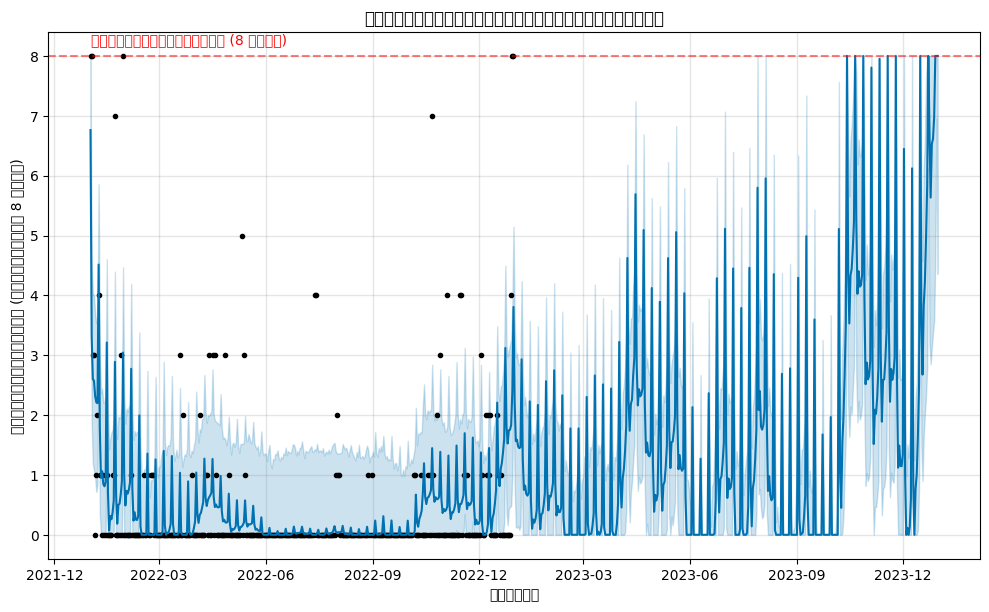

<Figure size 1400x1000 with 0 Axes>

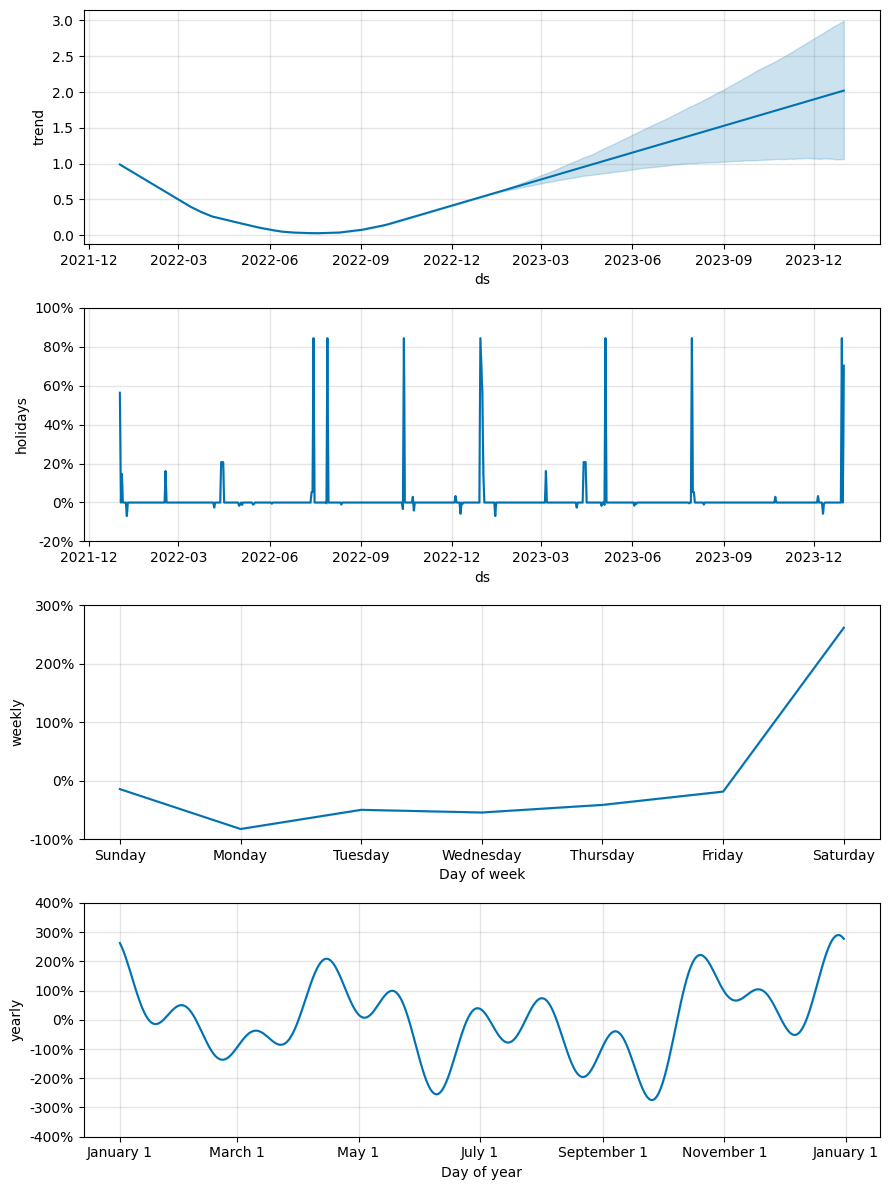

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3593 (\N{THAI CHARACTER CHO CHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/

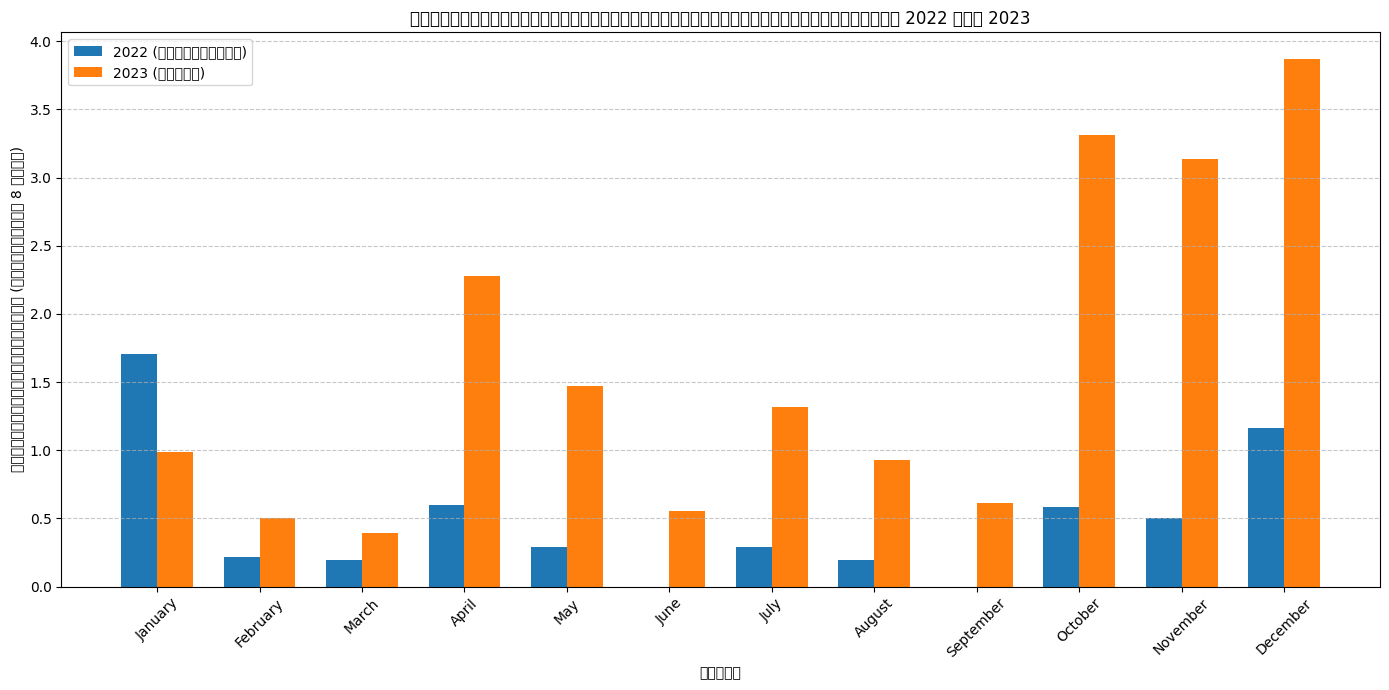

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


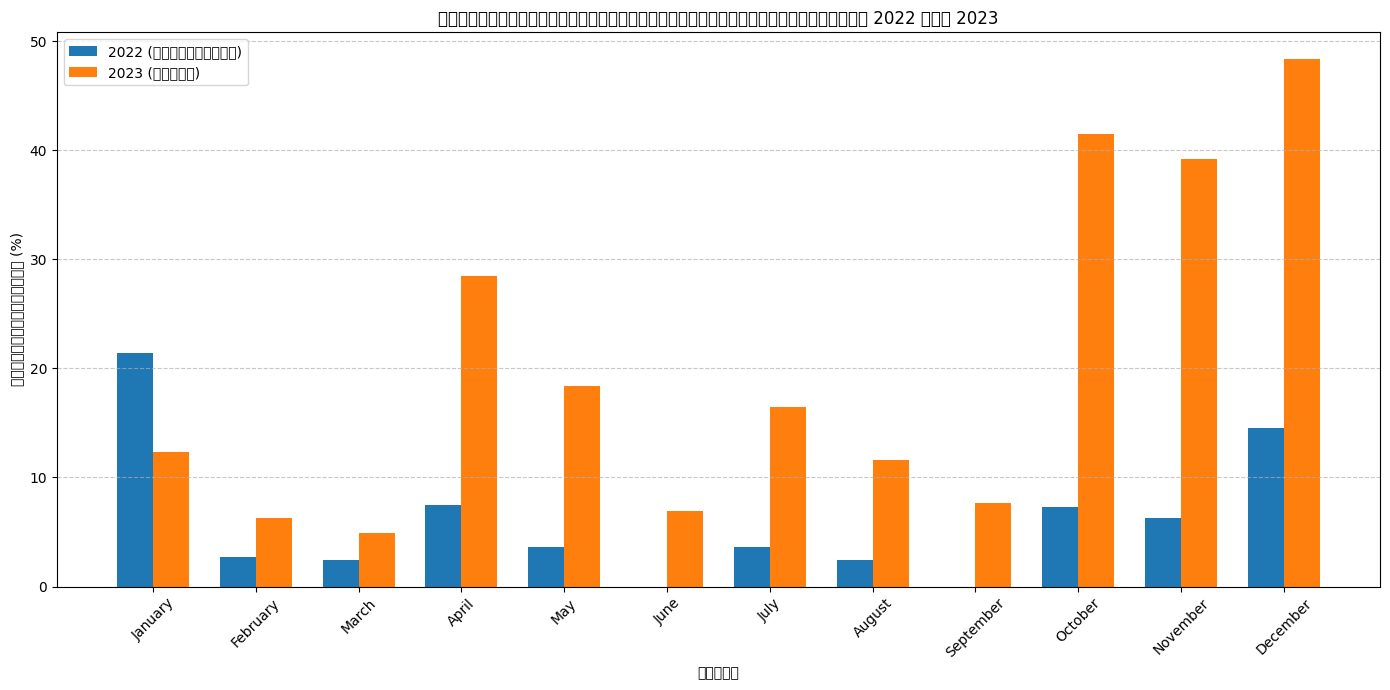

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3608 (\N{THAI CHARACTER THO THONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


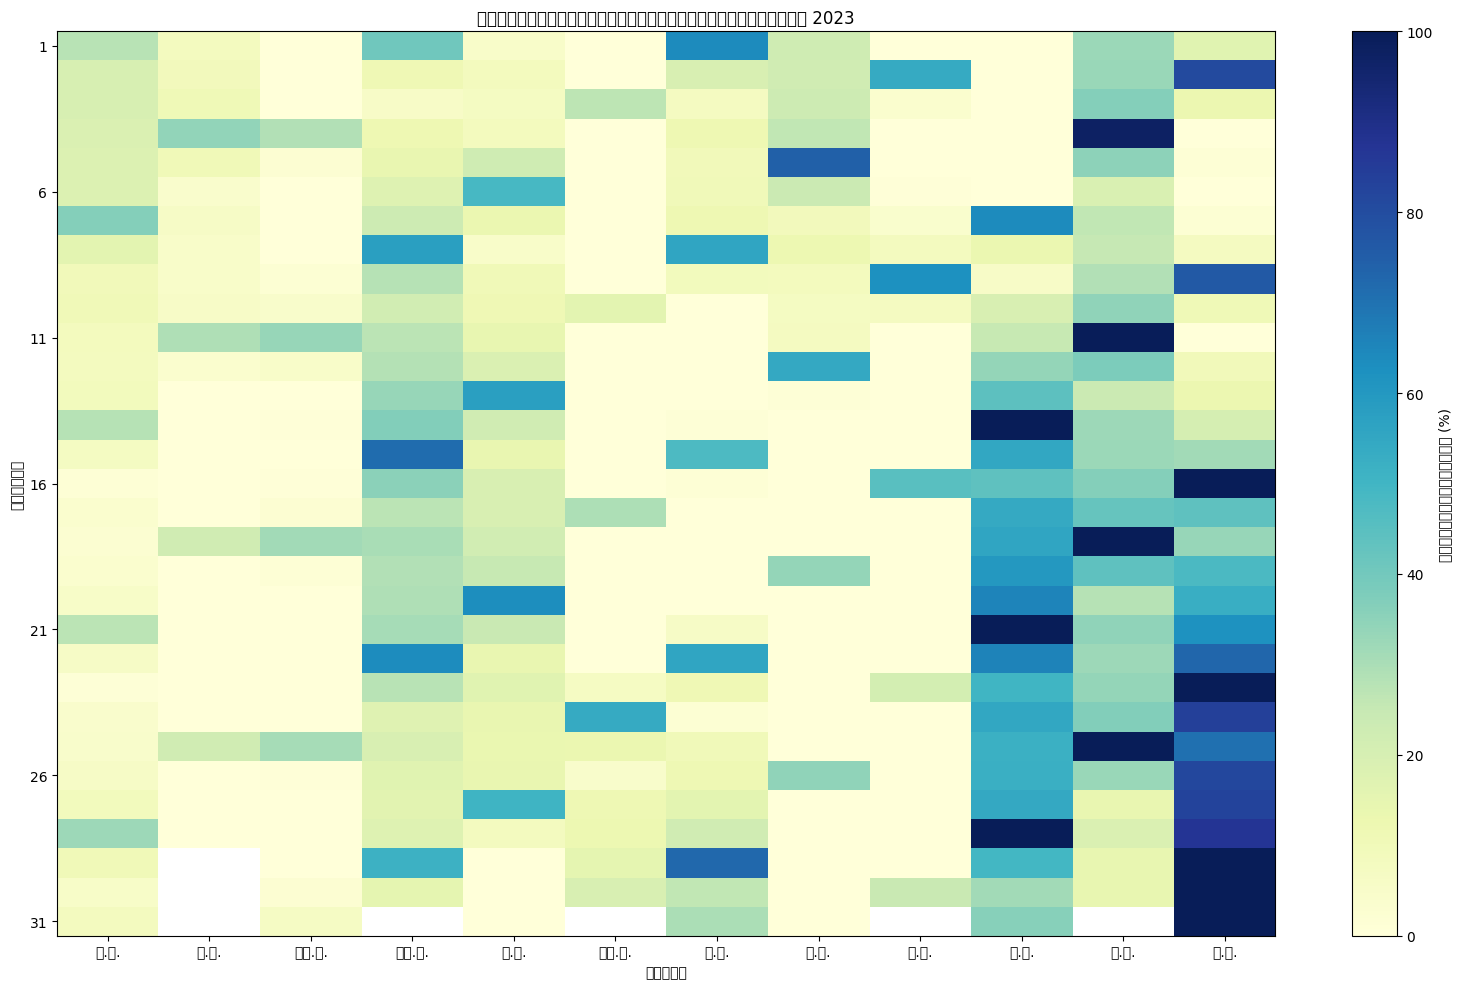


บันทึกผลการทำนายรายวันเรียบร้อยแล้วที่ booking_forecast_daily_2023.csv
บันทึกผลการทำนายรายเดือนเรียบร้อยแล้วที่ booking_forecast_monthly_2023.csv


In [27]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('booking_trend.csv')

# แปลงคอลัมน์วันที่เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# ตรวจสอบข้อมูล
print("ข้อมูลการจองห้องพัก 5 รายการแรก:")
print(df.head())

print("\nสรุปข้อมูล:")
print(df.describe())

# คำนวณอัตราการเข้าพัก (Occupancy Rate) รายวัน
df['occupancy_rate'] = df['booking'] / 8 * 100  # เป็นเปอร์เซ็นต์

# สร้าง DataFrame ที่เหมาะสมกับ Prophet
df_prophet = df[['date', 'booking']].rename(columns={'date': 'ds', 'booking': 'y'})

# สร้างวันหยุดไทยสำหรับ Prophet
thai_holidays = pd.DataFrame({
    'holiday': ['thai_newyear', 'thai_newyear', 'thai_newyear',
                'thai_newyear', 'thai_newyear', 'thai_newyear'],
    'ds': pd.to_datetime(['2022-04-13', '2022-04-14', '2022-04-15',  # สงกรานต์ 2022
                          '2023-04-13', '2023-04-14', '2023-04-15']),  # สงกรานต์ 2023
    'lower_window': 0,
    'upper_window': 0,
})

# สร้างโมเดล Prophet ที่เน้นความเป็นฤดูกาลรายปีและรายสัปดาห์
model = Prophet(
    yearly_seasonality=True,    # เปิดใช้ความเป็นฤดูกาลรายปี
    weekly_seasonality=True,    # เปิดใช้ความเป็นฤดูกาลรายสัปดาห์
    daily_seasonality=False,
    seasonality_mode='multiplicative',  # ใช้โหมดแบบคูณเพื่อแสดงความแตกต่างของฤดูกาลได้ชัดเจน
    seasonality_prior_scale=10,  # เพิ่มค่านี้เพื่อให้น้ำหนักกับความเป็นฤดูกาลมากขึ้น
    changepoint_prior_scale=0.05,  # ควบคุมความยืดหยุ่นของเทรนด์
    holidays=thai_holidays  # เพิ่มวันหยุดที่กำหนดเอง
)

# เพิ่มวันหยุดประเทศไทย
model.add_country_holidays(country_name='TH')

# ฟิตโมเดล
model.fit(df_prophet)

# ทำนายจำนวนห้องที่จองในอนาคต 365 วัน
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

# ประมวลผลการทำนาย
# กำหนดให้การทำนายต้องไม่เกิน 8 ห้อง และไม่น้อยกว่า 0
forecast['yhat'] = forecast['yhat'].clip(lower=0, upper=8)
forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0, upper=8)
forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0, upper=8)

# คำนวณอัตราการเข้าพัก (Occupancy Rate) จากการทำนาย
forecast['occupancy_rate'] = forecast['yhat'] / 8 * 100

# สร้างคอลัมน์เดือนและวันในสัปดาห์เพื่อการวิเคราะห์
forecast['month'] = forecast['ds'].dt.month_name()
forecast['day_of_week'] = forecast['ds'].dt.day_name()
forecast['year'] = forecast['ds'].dt.year

# แก้ไขจาก next_year = datetime.now().year + 1 เป็นการกำหนดค่าคงที่ 2023
next_year = 2023
next_year_forecast = forecast[forecast['year'] == next_year].copy()
next_year_forecast['yhat_rounded'] = np.round(next_year_forecast['yhat'], 2)
next_year_forecast['occupancy_rate_rounded'] = np.round(next_year_forecast['occupancy_rate'], 2)

print(f"\nทำนายจำนวนห้องที่จองเฉลี่ยรายเดือนในปี {next_year}:")
monthly_avg = next_year_forecast.groupby('month')[['yhat_rounded', 'occupancy_rate_rounded']].mean()
# เรียงเดือนให้ถูกต้อง
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)
print(monthly_avg)

# วิเคราะห์วันในสัปดาห์ที่มีการจองมากที่สุด
print(f"\nทำนายจำนวนห้องที่จองเฉลี่ยตามวันในสัปดาห์ในปี {next_year}:")
day_of_week_avg = next_year_forecast.groupby('day_of_week')[['yhat_rounded', 'occupancy_rate_rounded']].mean()
# เรียงวันในสัปดาห์ให้ถูกต้อง
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_avg = day_of_week_avg.reindex(day_order)
print(day_of_week_avg)

# แสดงกราฟการทำนาย
plt.figure(figsize=(14, 7))
fig = model.plot(forecast)
plt.title('การทำนายจำนวนห้องที่จองในอนาคต')
plt.xlabel('วันที่')
plt.ylabel('จำนวนห้องที่จอง (จากทั้งหมด 8 ห้อง)')
plt.axhline(y=8, color='r', linestyle='--', alpha=0.5)
plt.text(future['ds'].min(), 8.2, 'จำนวนห้องทั้งหมด (8 ห้อง)', color='r')

# แสดงองค์ประกอบของการทำนาย เพื่อดูความเป็นฤดูกาล
plt.figure(figsize=(14, 10))
components_fig = model.plot_components(forecast)
plt.tight_layout()

# แสดงกราฟเปรียบเทียบการจองตามเดือน
plt.figure(figsize=(14, 7))

# ข้อมูลจริงจากปี 2022
actual_data = df.copy()
actual_data['month'] = actual_data['date'].dt.month_name()
actual_monthly = actual_data.groupby('month')['booking'].mean()
actual_monthly = actual_monthly.reindex(month_order)

# ข้อมูลทำนายสำหรับปีหน้า
pred_monthly = monthly_avg['yhat_rounded']

# สร้างกราฟเปรียบเทียบ
bar_width = 0.35
x = np.arange(len(month_order))

plt.bar(x - bar_width/2, actual_monthly, bar_width, label='2022 (ข้อมูลจริง)')
plt.bar(x + bar_width/2, pred_monthly, bar_width, label=f'{next_year} (ทำนาย)')

plt.xlabel('เดือน')
plt.ylabel('จำนวนห้องที่จองเฉลี่ย (จากทั้งหมด 8 ห้อง)')
plt.title(f'เปรียบเทียบจำนวนห้องที่จองเฉลี่ยรายเดือนระหว่างปี 2022 และ {next_year}')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# สร้างกราฟแสดงอัตราการเข้าพัก (Occupancy Rate) รายเดือน
plt.figure(figsize=(14, 7))
plt.bar(x - bar_width/2, actual_monthly/8*100, bar_width, label='2022 (ข้อมูลจริง)')
plt.bar(x + bar_width/2, monthly_avg['occupancy_rate_rounded'], bar_width, label=f'{next_year} (ทำนาย)')

plt.xlabel('เดือน')
plt.ylabel('อัตราการเข้าพัก (%)')
plt.title(f'เปรียบเทียบอัตราการเข้าพักรายเดือนระหว่างปี 2022 และ {next_year}')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# แก้ไข heatmap ให้แสดงผลได้
plt.figure(figsize=(16, 10))

# สร้างข้อมูลสำหรับฮีทแมป
pivot_data = next_year_forecast.copy()
pivot_data['day'] = pivot_data['ds'].dt.day
pivot_data['month_num'] = pivot_data['ds'].dt.month

# สร้างตารางรายวันแยกตามเดือน
# จัดการกับปัญหาวันที่ไม่มีในบางเดือน โดยใช้ pivot table แบบมี fill_value
heatmap_data = pivot_data.pivot_table(
    index='day', 
    columns='month_num', 
    values='occupancy_rate_rounded', 
    aggfunc='mean',
    fill_value=np.nan  # ใช้ NaN สำหรับวันที่ไม่มีในบางเดือน
)

# ใช้เทคนิค masked array เพื่อซ่อนค่า NaN ในการแสดงผล
mask = np.isnan(heatmap_data.values)
masked_data = np.ma.masked_array(heatmap_data.values, mask)

# พล็อตฮีทแมปด้วย masked array
plt.imshow(masked_data, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='อัตราการเข้าพัก (%)')
plt.title(f'การทำนายอัตราการเข้าพักรายวันในปี {next_year}')
plt.xlabel('เดือน')
plt.ylabel('วันที่')
plt.xticks(np.arange(12), ['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()

plt.show()

# บันทึกผลการทำนาย
# ผลการทำนายรายวันสำหรับปี 2023
next_year_forecast[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'yhat_lower', 'yhat_upper']].to_csv(
    f'booking_forecast_daily_{next_year}.csv', index=False)

# ผลการทำนายรายเดือนสำหรับปี 2023
monthly_summary = next_year_forecast.groupby('month').agg({
    'yhat_rounded': 'mean',
    'occupancy_rate_rounded': 'mean',
    'yhat_lower': 'mean',
    'yhat_upper': 'mean'
}).reset_index()

monthly_summary = monthly_summary.set_index('month').reindex(month_order).reset_index()
monthly_summary.to_csv(f'booking_forecast_monthly_{next_year}.csv', index=False)

print(f"\nบันทึกผลการทำนายรายวันเรียบร้อยแล้วที่ booking_forecast_daily_{next_year}.csv")
print(f"บันทึกผลการทำนายรายเดือนเรียบร้อยแล้วที่ booking_forecast_monthly_{next_year}.csv")

00:47:14 - cmdstanpy - INFO - Chain [1] start processing


First 5 booking records:
        date  booking  accuracy
0 2022-01-01      8.0      1.00
1 2022-01-02      8.0      1.00
2 2022-01-03      3.0      0.38
3 2022-01-04      3.0      0.38
4 2022-01-05      0.0      0.00

Data summary:
                                date     booking    accuracy
count                            365  365.000000  365.000000
mean   2022-07-01 23:59:59.999999744    0.482192    0.059918
min              2022-01-01 00:00:00    0.000000    0.000000
25%              2022-04-02 00:00:00    0.000000    0.000000
50%              2022-07-02 00:00:00    0.000000    0.000000
75%              2022-10-01 00:00:00    0.000000    0.000000
max              2022-12-31 00:00:00    8.000000    1.000000
std                              NaN    1.329230    0.166335


00:47:15 - cmdstanpy - INFO - Chain [1] done processing



Average monthly room bookings forecast for 2023:
           yhat_rounded  occupancy_rate_rounded
month                                          
January        0.989355               12.370323
February       0.500357                6.249286
March          0.393548                4.928710
April          2.275667               28.452333
May            1.468065               18.351290
June           0.557333                6.965667
July           1.318387               16.480323
August         0.929032               11.612258
September      0.613000                7.659000
October        3.315806               41.451613
November       3.137333               39.212000
December       3.872258               48.390645

Average room bookings by day of week for 2023:
             yhat_rounded  occupancy_rate_rounded
day_of_week                                      
Monday           0.803846               10.049808
Tuesday          1.047308               13.092885
Wednesday        1.026538     

<Figure size 1400x700 with 0 Axes>

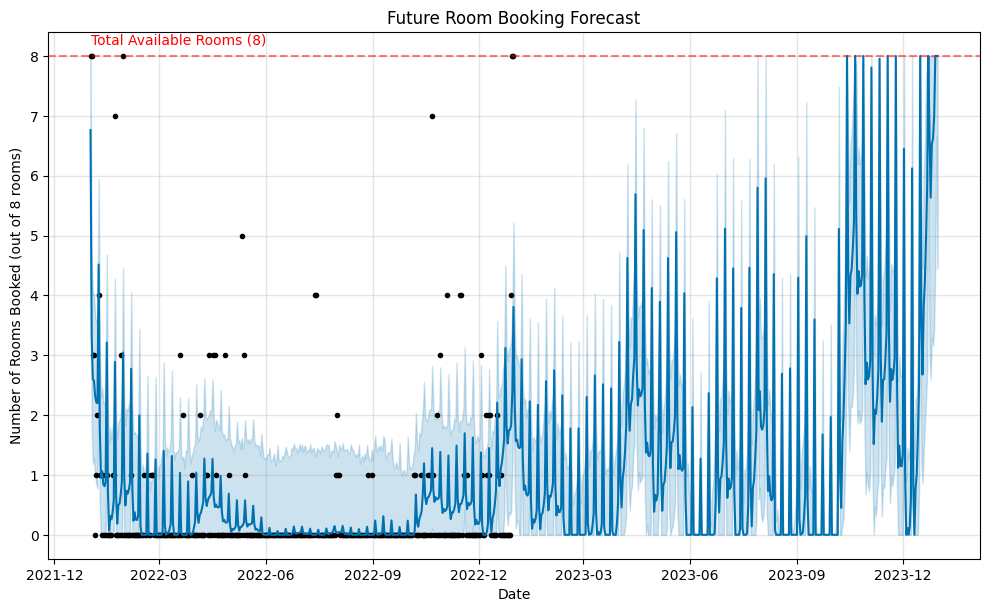

<Figure size 1400x1000 with 0 Axes>

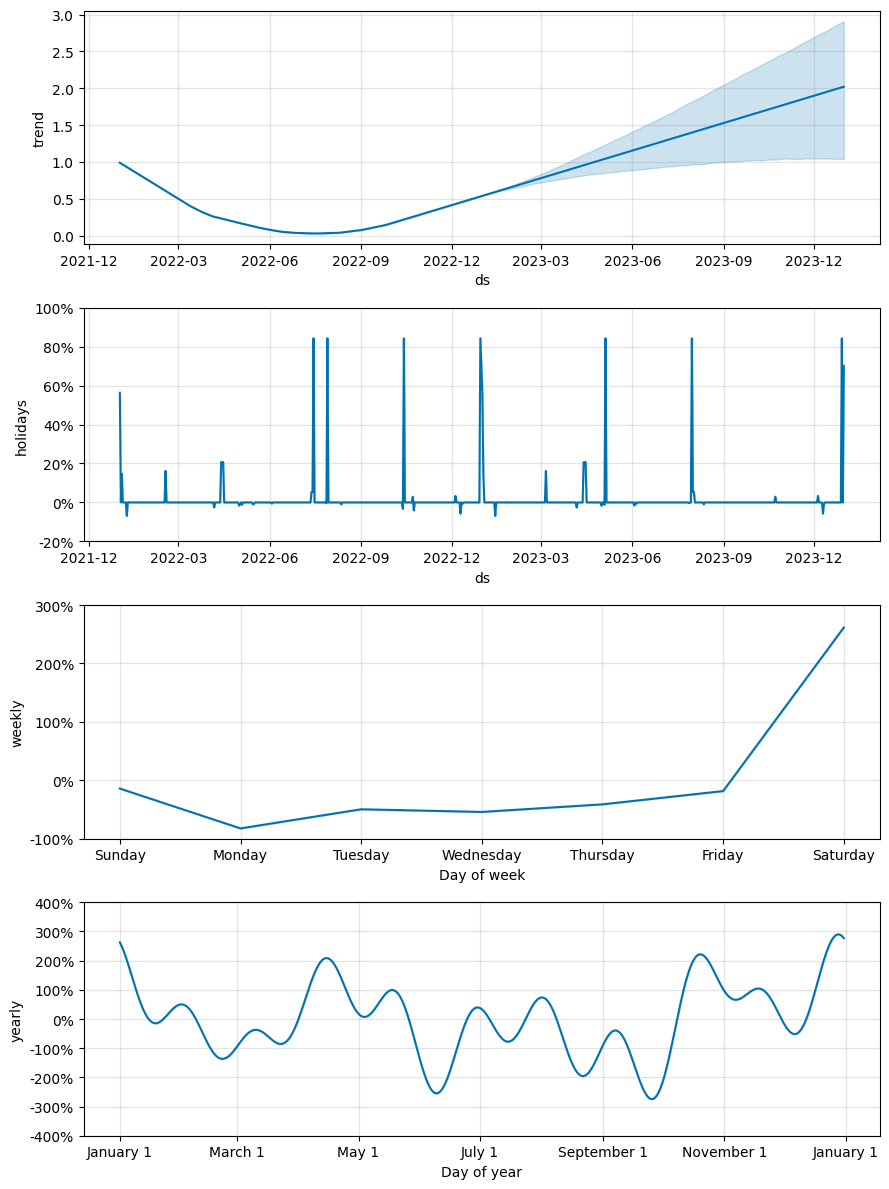

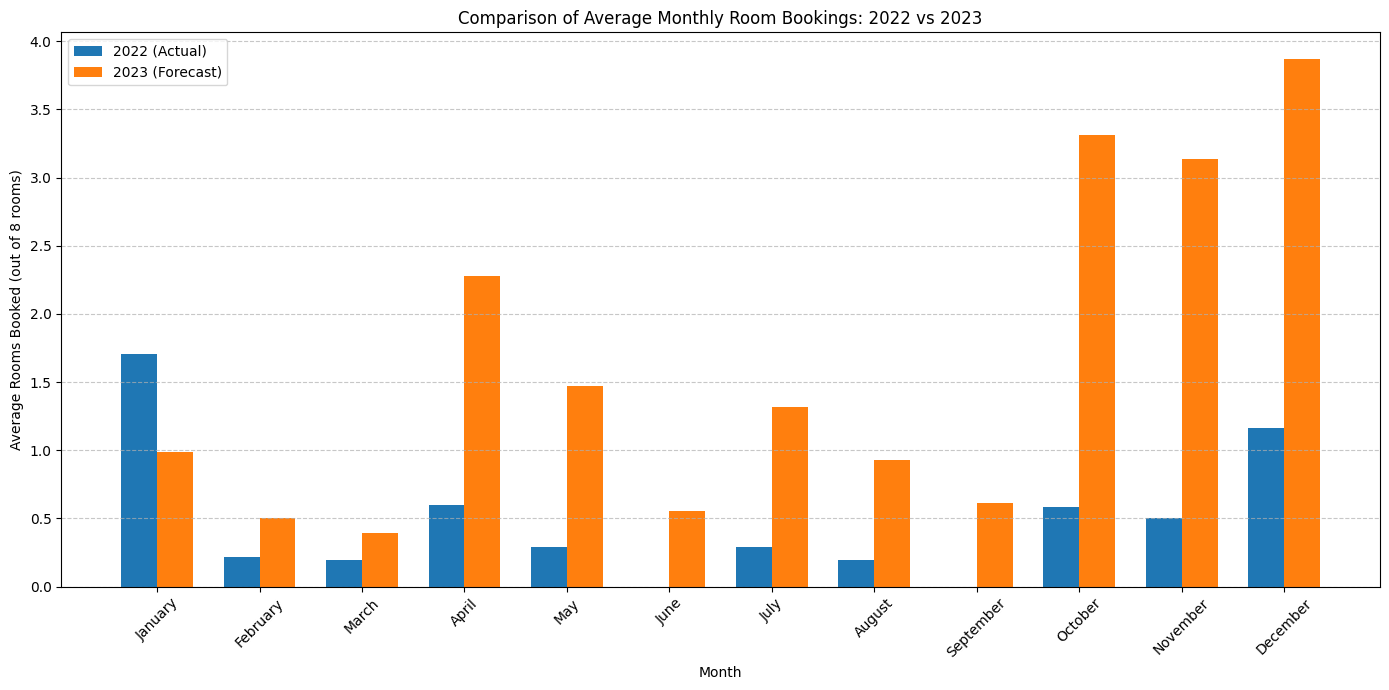

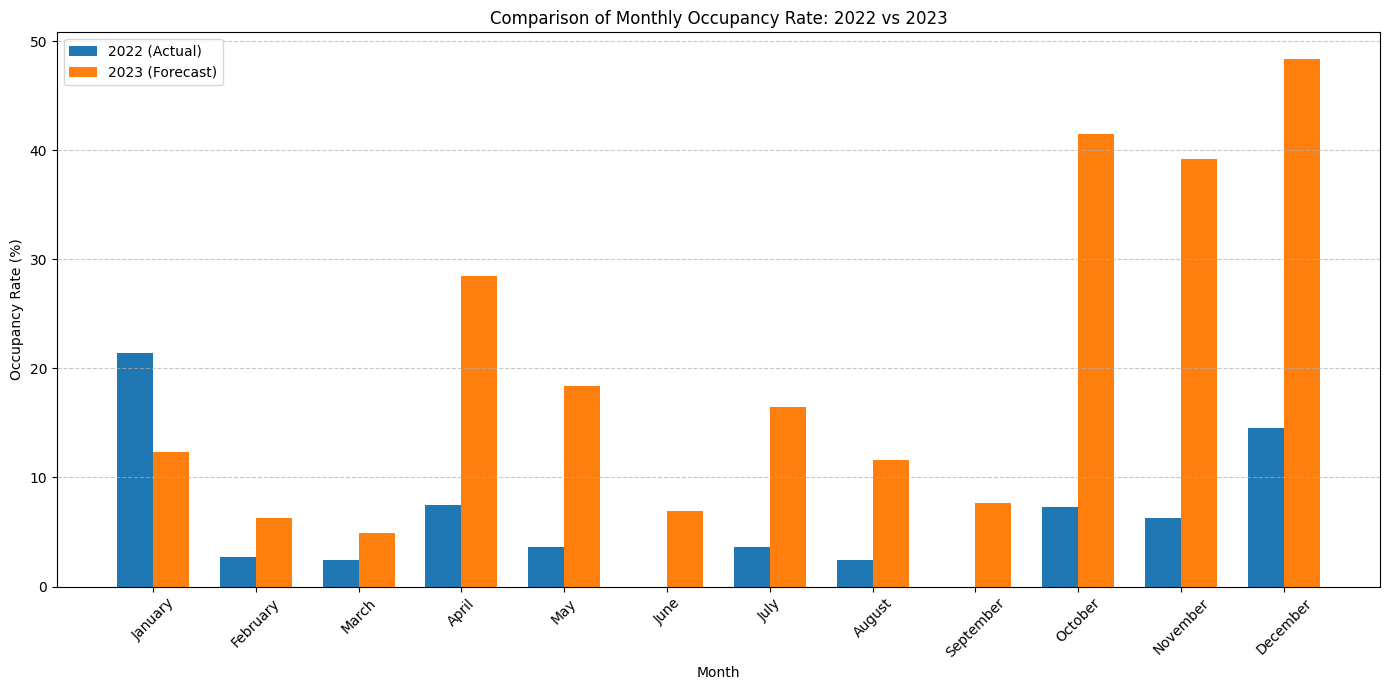

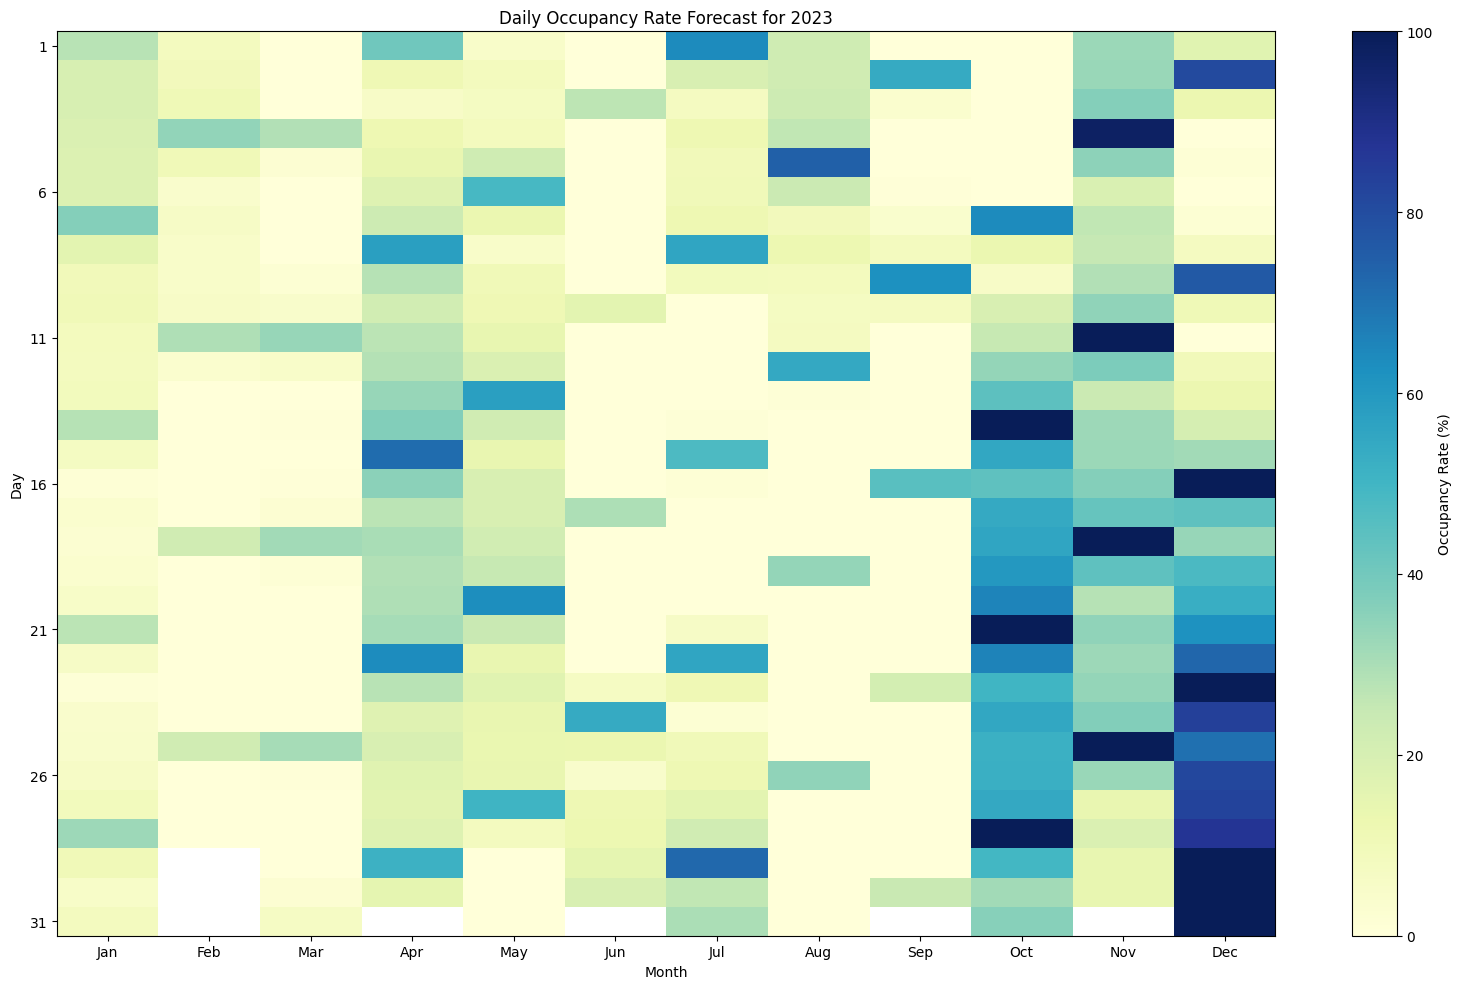


Daily forecast saved successfully to booking_forecast_daily_2023.csv
Monthly forecast saved successfully to booking_forecast_monthly_2023.csv


In [28]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Read data from CSV file
df = pd.read_csv('booking_trend.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Check data
print("First 5 booking records:")
print(df.head())

print("\nData summary:")
print(df.describe())

# Calculate daily occupancy rate
df['occupancy_rate'] = df['booking'] / 8 * 100  # as percentage

# Create DataFrame suitable for Prophet
df_prophet = df[['date', 'booking']].rename(columns={'date': 'ds', 'booking': 'y'})

# Create Thai holidays for Prophet
thai_holidays = pd.DataFrame({
    'holiday': ['thai_newyear', 'thai_newyear', 'thai_newyear',
                'thai_newyear', 'thai_newyear', 'thai_newyear'],
    'ds': pd.to_datetime(['2022-04-13', '2022-04-14', '2022-04-15',  # Songkran 2022
                          '2023-04-13', '2023-04-14', '2023-04-15']),  # Songkran 2023
    'lower_window': 0,
    'upper_window': 0,
})

# Create Prophet model emphasizing yearly and weekly seasonality
model = Prophet(
    yearly_seasonality=True,    # Enable yearly seasonality
    weekly_seasonality=True,    # Enable weekly seasonality
    daily_seasonality=False,
    seasonality_mode='multiplicative',  # Use multiplicative mode for clearer seasonal differences
    seasonality_prior_scale=10,  # Increase this value to give more weight to seasonality
    changepoint_prior_scale=0.05,  # Control trend flexibility
    holidays=thai_holidays  # Add custom holidays
)

# Add Thai country holidays
model.add_country_holidays(country_name='TH')

# Fit the model
model.fit(df_prophet)

# Predict room bookings for the next 365 days
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

# Process predictions
# Ensure predictions don't exceed 8 rooms and aren't less than 0
forecast['yhat'] = forecast['yhat'].clip(lower=0, upper=8)
forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0, upper=8)
forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0, upper=8)

# Calculate occupancy rate from predictions
forecast['occupancy_rate'] = forecast['yhat'] / 8 * 100

# Create month and day of week columns for analysis
forecast['month'] = forecast['ds'].dt.month_name()
forecast['day_of_week'] = forecast['ds'].dt.day_name()
forecast['year'] = forecast['ds'].dt.year

# Set next_year to 2023
next_year = 2023
next_year_forecast = forecast[forecast['year'] == next_year].copy()
next_year_forecast['yhat_rounded'] = np.round(next_year_forecast['yhat'], 2)
next_year_forecast['occupancy_rate_rounded'] = np.round(next_year_forecast['occupancy_rate'], 2)

print(f"\nAverage monthly room bookings forecast for {next_year}:")
monthly_avg = next_year_forecast.groupby('month')[['yhat_rounded', 'occupancy_rate_rounded']].mean()
# Sort months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)
print(monthly_avg)

# Analyze day of week with highest bookings
print(f"\nAverage room bookings by day of week for {next_year}:")
day_of_week_avg = next_year_forecast.groupby('day_of_week')[['yhat_rounded', 'occupancy_rate_rounded']].mean()
# Sort days of week correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_avg = day_of_week_avg.reindex(day_order)
print(day_of_week_avg)

# Show forecast graph
plt.figure(figsize=(14, 7))
fig = model.plot(forecast)
plt.title('Future Room Booking Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Rooms Booked (out of 8 rooms)')
plt.axhline(y=8, color='r', linestyle='--', alpha=0.5)
plt.text(future['ds'].min(), 8.2, 'Total Available Rooms (8)', color='r')

# Show forecast components to view seasonality
plt.figure(figsize=(14, 10))
components_fig = model.plot_components(forecast)
plt.tight_layout()

# Show comparison graph of bookings by month
plt.figure(figsize=(14, 7))

# Actual data from 2022
actual_data = df.copy()
actual_data['month'] = actual_data['date'].dt.month_name()
actual_monthly = actual_data.groupby('month')['booking'].mean()
actual_monthly = actual_monthly.reindex(month_order)

# Forecast data for next year
pred_monthly = monthly_avg['yhat_rounded']

# Create comparison graph
bar_width = 0.35
x = np.arange(len(month_order))

plt.bar(x - bar_width/2, actual_monthly, bar_width, label='2022 (Actual)')
plt.bar(x + bar_width/2, pred_monthly, bar_width, label=f'{next_year} (Forecast)')

plt.xlabel('Month')
plt.ylabel('Average Rooms Booked (out of 8 rooms)')
plt.title(f'Comparison of Average Monthly Room Bookings: 2022 vs {next_year}')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Create graph showing monthly occupancy rate
plt.figure(figsize=(14, 7))
plt.bar(x - bar_width/2, actual_monthly/8*100, bar_width, label='2022 (Actual)')
plt.bar(x + bar_width/2, monthly_avg['occupancy_rate_rounded'], bar_width, label=f'{next_year} (Forecast)')

plt.xlabel('Month')
plt.ylabel('Occupancy Rate (%)')
plt.title(f'Comparison of Monthly Occupancy Rate: 2022 vs {next_year}')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Create heatmap showing daily occupancy rate for next year
plt.figure(figsize=(16, 10))

# Create data for heatmap
pivot_data = next_year_forecast.copy()
pivot_data['day'] = pivot_data['ds'].dt.day
pivot_data['month_num'] = pivot_data['ds'].dt.month

# Create daily table by month
# Handle the issue of missing days in some months using pivot table with fill_value
heatmap_data = pivot_data.pivot_table(
    index='day', 
    columns='month_num', 
    values='occupancy_rate_rounded', 
    aggfunc='mean',
    fill_value=np.nan  # Use NaN for days that don't exist in some months
)

# Use masked array technique to hide NaN values in visualization
mask = np.isnan(heatmap_data.values)
masked_data = np.ma.masked_array(heatmap_data.values, mask)

# Plot heatmap with masked array
plt.imshow(masked_data, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Occupancy Rate (%)')
plt.title(f'Daily Occupancy Rate Forecast for {next_year}')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()

plt.show()

# Save forecast results
# Daily forecast for next year
next_year_forecast[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'yhat_lower', 'yhat_upper']].to_csv(
    f'booking_forecast_daily_{next_year}.csv', index=False)

# Monthly forecast for next year
monthly_summary = next_year_forecast.groupby('month').agg({
    'yhat_rounded': 'mean',
    'occupancy_rate_rounded': 'mean',
    'yhat_lower': 'mean',
    'yhat_upper': 'mean'
}).reset_index()

monthly_summary = monthly_summary.set_index('month').reindex(month_order).reset_index()
monthly_summary.to_csv(f'booking_forecast_monthly_{next_year}.csv', index=False)

print(f"\nDaily forecast saved successfully to booking_forecast_daily_{next_year}.csv")
print(f"Monthly forecast saved successfully to booking_forecast_monthly_{next_year}.csv")

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install pandas numpy matplotlib seaborn scikit-learn prophet

  Using cached pandas-2.2.3-cp312-cp312-macosx_10_9_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.3-cp312-cp312-macosx_14_0_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (31 kB)
  Using cached prophet-1.1.6-py3-none-macosx_10_11_x86_64.whl.metadata (3.5 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_10_13_x86_64.whl.meta

Revenue Planning and Dynamic Pricing Strategy Report

Projected Monthly Revenue:
        month  estimated_revenue  target_revenue
4     January          116337.30      127971.030
3    February           53144.62       58459.082
7       March           39127.92       43040.712
0       April          293392.17      322731.387
8         May          136578.32      150236.152
6        June           49102.24       54012.464
5        July          134227.85      147650.635
1      August           97464.69      107211.159
11  September           62789.15       69068.065
10    October          354130.57      389543.627
9    November          321788.12      353966.932
2    December          607903.44      668693.784

Projected Annual Revenue: 2,265,986.39 THB
Annual Revenue Target: 2,492,585.03 THB

Promotion Plan for Low Occupancy Periods:
       month  occupancy_rate         promotion_type  discount_percentage  \
0    January       12.370323    Early Bird Discount                   15   
1  

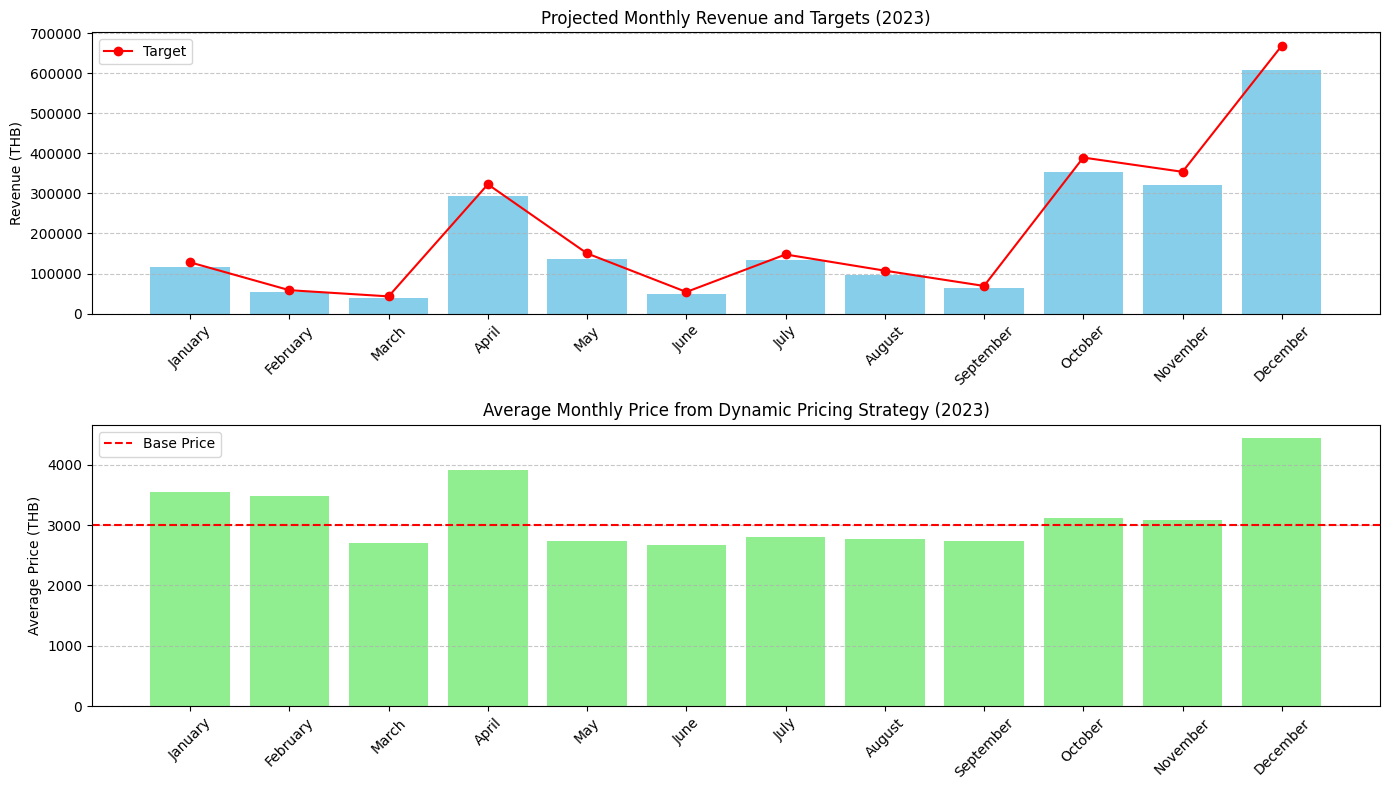

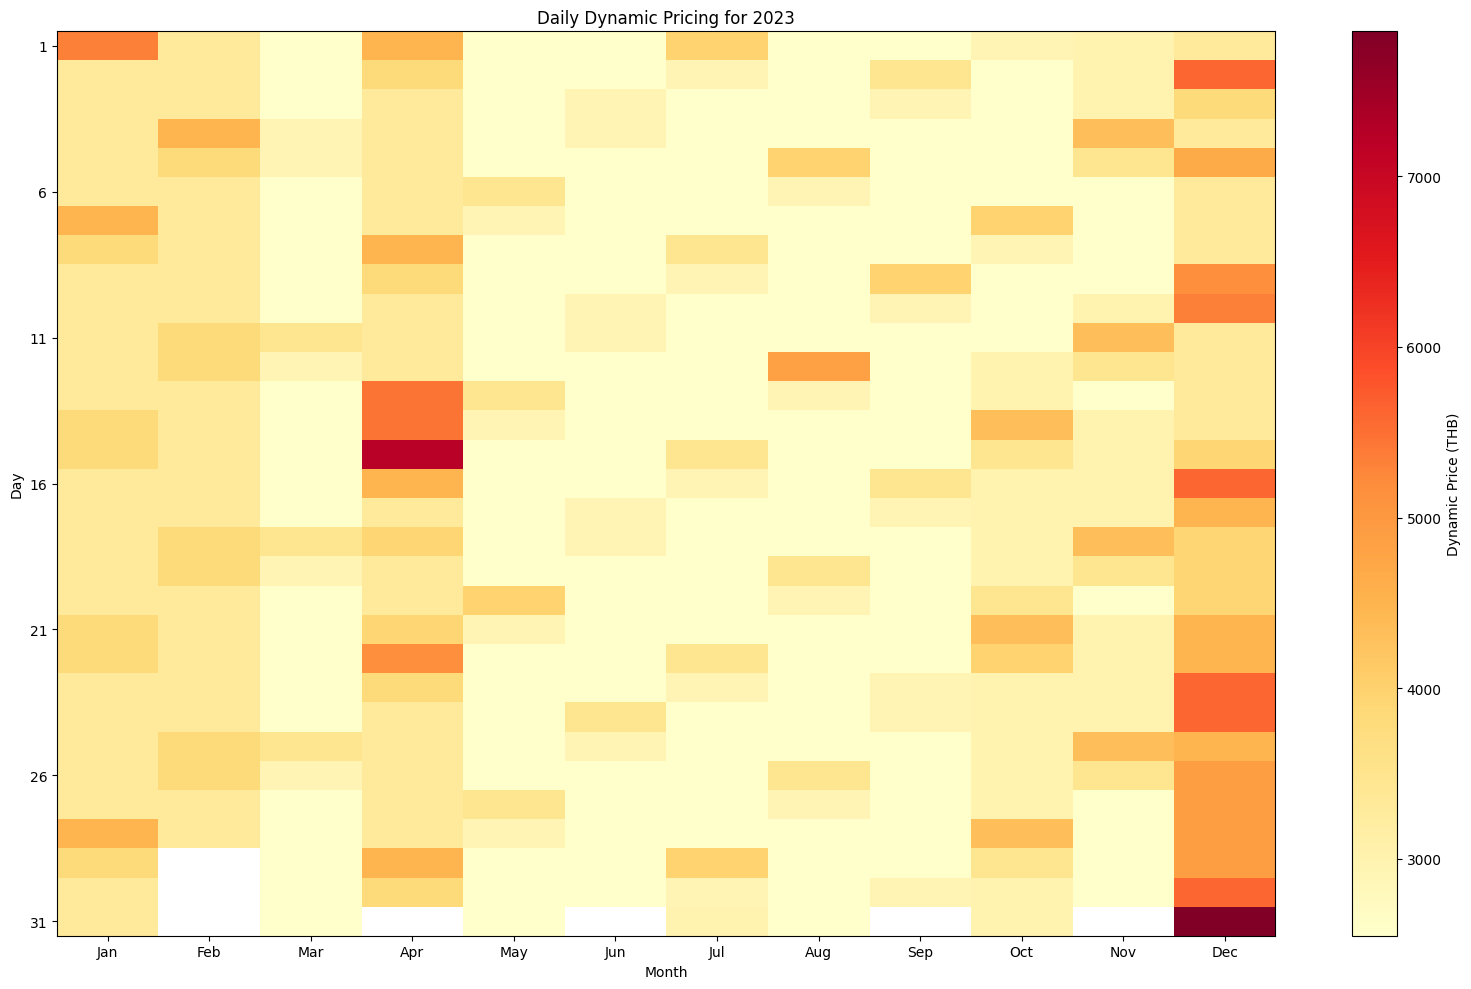

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# 1. Load the saved forecast data
forecast_daily = pd.read_csv('booking_forecast_daily_2023.csv')
forecast_monthly = pd.read_csv('booking_forecast_monthly_2023.csv')

# Convert date column to datetime format
forecast_daily['ds'] = pd.to_datetime(forecast_daily['ds'])

# Add month and day of week columns
forecast_daily['month'] = forecast_daily['ds'].dt.month_name()
forecast_daily['day_of_week'] = forecast_daily['ds'].dt.day_name()
forecast_daily['is_weekend'] = forecast_daily['day_of_week'].isin(['Saturday', 'Sunday'])

# Add columns for Thai holidays (example - you may need to add other holidays)
thai_holidays = {
    '2023-01-01': 'New Year\'s Day',
    '2023-04-13': 'Songkran',
    '2023-04-14': 'Songkran',
    '2023-04-15': 'Songkran',
    # '2023-05-01': 'Labor Day',
    # '2023-05-04': 'Coronation Day',
    # '2023-06-03': 'Queen\'s Birthday',
    # '2023-07-28': 'King\'s Birthday',
    '2023-08-12': 'Mother\'s Day',
    # '2023-10-13': 'King Rama IX Memorial Day',
    '2023-12-05': 'Father\'s Day',
    '2023-12-10': 'Constitution Day',
    '2023-12-31': 'New Year\'s Eve'
}

# Convert holidays to datetime format
thai_holidays_dates = {pd.to_datetime(date): holiday for date, holiday in thai_holidays.items()}

# Add holiday columns
forecast_daily['is_holiday'] = forecast_daily['ds'].apply(lambda x: x in thai_holidays_dates)
forecast_daily['holiday_name'] = forecast_daily['ds'].apply(lambda x: thai_holidays_dates.get(x, ''))

# Create function to define high season (example - adjust according to your business)
def is_high_season(date):
    month = date.month
    # Assume high season is Dec-Feb and Apr
    if month in [12, 1, 2, 4]:
        return True
    return False

forecast_daily['is_high_season'] = forecast_daily['ds'].apply(is_high_season)

# Set base price per room
base_price = 3000  # THB per room

# 2. Dynamic price calculation
def calculate_dynamic_price(row):
    price = base_price
    
    # Adjust price based on season
    if row['is_high_season']:
        price *= 1.3  # Increase price by 30% during high season
    
    # Adjust price based on weekend
    if row['is_weekend']:
        price *= 1.15  # Increase price by 15% on weekends
    
    # Adjust price based on holidays
    if row['is_holiday']:
        price *= 1.4  # Increase price by 40% on holidays
    
    # Adjust price based on booking rate (Demand-based pricing)
    occupancy_rate = row['occupancy_rate_rounded']
    
    if occupancy_rate > 80:
        price *= 1.25  # Increase price by 25% when booking rate is very high
    elif occupancy_rate > 60:
        price *= 1.15  # Increase price by 15% when booking rate is high
    elif occupancy_rate < 30:
        price *= 0.85  # Decrease price by 15% when booking rate is low
    elif occupancy_rate < 15:
        price *= 0.75  # Decrease price by 25% when booking rate is very low
    
    return round(price)

# Calculate dynamic prices
forecast_daily['dynamic_price'] = forecast_daily.apply(calculate_dynamic_price, axis=1)

# 3. Calculate projected revenue
forecast_daily['estimated_revenue'] = forecast_daily['yhat_rounded'] * forecast_daily['dynamic_price']

# Calculate monthly revenue
monthly_revenue = forecast_daily.groupby('month').agg({
    'estimated_revenue': 'sum',
    'yhat_rounded': 'mean',
    'dynamic_price': 'mean'
}).reset_index()

# Sort months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['month'] = pd.Categorical(monthly_revenue['month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month')

# 4. Set financial targets
# Calculate target revenue from projected revenue plus 10%
total_yearly_revenue = monthly_revenue['estimated_revenue'].sum()
target_yearly_revenue = total_yearly_revenue * 1.1  # Target 10% higher than forecast

# Set monthly targets based on the proportion of projected revenue
monthly_revenue['revenue_proportion'] = monthly_revenue['estimated_revenue'] / total_yearly_revenue
monthly_revenue['target_revenue'] = monthly_revenue['revenue_proportion'] * target_yearly_revenue

# 5. Create promotion plan for periods with low booking rates
# Check if 'month' exists in forecast_monthly
if 'month' not in forecast_monthly.columns and 'ds' in forecast_monthly.columns:
    forecast_monthly['ds'] = pd.to_datetime(forecast_monthly['ds'])
    forecast_monthly['month'] = forecast_monthly['ds'].dt.month_name()

# Filter data for months with low booking rates
low_occupancy_df = forecast_monthly[forecast_monthly['occupancy_rate_rounded'] < 40]
num_months = len(low_occupancy_df)

if num_months > 0:
    # Create lists for promotion plan
    promotion_types = ['Early Bird Discount', 'Stay 3 Pay 2', 'Free Breakfast', 'Free Airport Transfer'] * (num_months // 4 + 1)
    discount_percentages = [15, 33, 10, 5] * (num_months // 4 + 1)
    booking_increases = [20, 25, 15, 10] * (num_months // 4 + 1)
    
    # Create DataFrame for promotion plan
    promotion_plan = pd.DataFrame({
        'month': low_occupancy_df['month'].values,
        'occupancy_rate': low_occupancy_df['occupancy_rate_rounded'].values,
        'promotion_type': promotion_types[:num_months],
        'discount_percentage': discount_percentages[:num_months],
        'estimated_booking_increase': booking_increases[:num_months]
    })
else:
    # Create empty DataFrame if there are no months with low booking rates
    promotion_plan = pd.DataFrame(columns=[
        'month', 'occupancy_rate', 'promotion_type',
        'discount_percentage', 'estimated_booking_increase'
    ])

# 6. Create financial reports and analysis
print("="*50)
print("Revenue Planning and Dynamic Pricing Strategy Report")
print("="*50)

print("\nProjected Monthly Revenue:")
print(monthly_revenue[['month', 'estimated_revenue', 'target_revenue']])

print(f"\nProjected Annual Revenue: {total_yearly_revenue:,.2f} THB")
print(f"Annual Revenue Target: {target_yearly_revenue:,.2f} THB")

print("\nPromotion Plan for Low Occupancy Periods:")
print(promotion_plan)

# 7. Create graphs and visualizations
plt.figure(figsize=(14, 8))

# Monthly revenue graph
plt.subplot(2, 1, 1)
plt.bar(monthly_revenue['month'], monthly_revenue['estimated_revenue'], color='skyblue')
plt.plot(monthly_revenue['month'], monthly_revenue['target_revenue'], 'ro-', label='Target')
plt.title('Projected Monthly Revenue and Targets (2023)')
plt.ylabel('Revenue (THB)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Average monthly price graph
plt.subplot(2, 1, 2)
plt.bar(monthly_revenue['month'], monthly_revenue['dynamic_price'], color='lightgreen')
plt.axhline(y=base_price, color='r', linestyle='--', label='Base Price')
plt.title('Average Monthly Price from Dynamic Pricing Strategy (2023)')
plt.ylabel('Average Price (THB)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('revenue_planning_2023.png')

# 8. Show daily dynamic pricing graph (Heatmap)
plt.figure(figsize=(16, 10))

# Create data for heatmap
pivot_price = forecast_daily.copy()
pivot_price['day'] = pivot_price['ds'].dt.day
pivot_price['month_num'] = pivot_price['ds'].dt.month

# Create daily price table by month
heatmap_price = pivot_price.pivot_table(
    index='day', 
    columns='month_num', 
    values='dynamic_price', 
    aggfunc='mean',
    fill_value=np.nan
)

# Use masked array technique to hide NaN values in the display
mask = np.isnan(heatmap_price.values)
masked_price_data = np.ma.masked_array(heatmap_price.values, mask)

# Create heatmap
plt.imshow(masked_price_data, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Dynamic Price (THB)')
plt.title('Daily Dynamic Pricing for 2023')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()
plt.savefig('dynamic_pricing_heatmap_2023.png')

# 9. Save data for future use
forecast_daily[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'dynamic_price', 'estimated_revenue']].to_csv(
    'financial_forecast_daily_2023.csv', index=False)

monthly_revenue.to_csv('financial_forecast_monthly_2023.csv', index=False)
promotion_plan.to_csv('promotion_plan_2023.csv', index=False)

print("\nData and graphs have been saved successfully")
print("financial_forecast_daily_2023.csv - Daily financial data")
print("financial_forecast_monthly_2023.csv - Monthly financial data")
print("promotion_plan_2023.csv - Promotion plan")
print("revenue_planning_2023.png - Revenue and average price graphs")
print("dynamic_pricing_heatmap_2023.png - Dynamic pricing heatmap")